In [1]:
import numpy as np
import galpro as gp
from astropy.table import Table
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numba
from numba import njit, prange
sns.set()
#sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale = 0.8)
sns.set_style("ticks")

In [2]:
# Lectura de datos
sdss_f = Table.read('firefly.fits')
sdss_f = sdss_f.to_pandas()
sdss_f.describe()

,objid,modelmag_u,modelmag_g,modelmag_r,modelmag_i,modelmag_z,modelMagErr_u,modelMagErr_g,modelMagErr_r,modelMagErr_i,...,Chabrier_MILES_age_lightW_low_1sig,Chabrier_MILES_total_mass,Chabrier_MILES_total_mass_up_1sig,Chabrier_MILES_total_mass_low_1sig,Z_NOQSO,Z_ERR_NOQSO,w1mag,w2mag,w1sigmag,w2sigmag
count,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,...,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06,1.823940e+06
mean,1.237664e+18,2.190825e+01,2.019960e+01,1.900446e+01,1.828134e+01,1.783241e+01,4.860968e-01,3.034060e-02,4.778364e-02,4.400825e-03,...,4.012871e+09,8.645808e+11,1.601401e+12,5.619350e+11,3.622103e-01,3.451672e-04,1.474408e+01,1.476648e+01,2.772285e+01,5.320650e+02
std,8.071345e+12,3.068943e+01,2.976252e+01,1.951369e+00,1.667261e+01,2.574329e+01,3.053414e+01,2.961587e+01,9.505250e-02,1.655559e+01,...,2.883227e+09,1.990488e+14,3.076646e+14,1.402744e+14,2.643933e-01,1.232947e-02,1.811691e+01,4.675645e+01,5.249987e+02,2.276397e+03
min,1.237646e+18,-9.999000e+03,-9.999000e+03,1.093223e+01,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,1.460256e-03,-9.999000e+03,...,3.150416e+07,6.569957e+00,3.515474e+01,2.687851e+00,7.629748e-06,2.755609e-08,7.754000e+00,6.456000e+00,5.000000e-03,5.000000e-03
25%,1.237658e+18,1.988576e+01,1.824849e+01,1.739374e+01,1.696370e+01,1.665336e+01,7.206018e-02,9.186987e-03,6.719161e-03,6.715965e-03,...,1.730767e+09,1.913292e+10,3.414572e+10,1.117989e+10,1.169350e-01,2.158676e-05,1.404600e+01,1.385200e+01,2.100000e-02,5.200000e-02
50%,1.237663e+18,2.222300e+01,2.061859e+01,1.898842e+01,1.835936e+01,1.797100e+01,3.989745e-01,4.632830e-02,1.808464e-02,1.604225e-02,...,3.629944e+09,5.513953e+10,8.476884e+10,3.404705e+10,3.345541e-01,6.376094e-05,1.472700e+01,1.457500e+01,3.800000e-02,1.010000e-01
75%,1.237668e+18,2.381873e+01,2.222643e+01,2.066218e+01,1.967993e+01,1.921976e+01,9.319945e-01,1.517605e-01,6.110542e-02,3.880709e-02,...,5.978926e+09,1.194992e+11,1.651541e+11,7.568667e+10,5.570847e-01,1.487330e-04,1.539800e+01,1.528100e+01,7.000000e-02,1.990000e-01
max,1.237681e+18,3.345042e+01,3.210238e+01,3.199010e+01,3.210178e+01,2.955640e+01,3.687848e+01,4.114543e+01,2.496444e+01,5.515096e+01,...,1.482509e+10,1.761312e+17,2.540280e+17,1.242000e+17,1.889876e+00,1.821217e+00,9.999000e+03,9.999000e+03,9.999000e+03,9.999000e+03


In [3]:
len(sdss_f)

1823940

In [4]:
sdss_f.columns

Index(['objid', 'modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i',
       'modelmag_z', 'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r',
       'modelMagErr_i', 'modelMagErr_z', 'Chabrier_MILES_age_lightW',
       'Chabrier_MILES_age_lightW_up_1sig',
       'Chabrier_MILES_age_lightW_low_1sig', 'Chabrier_MILES_total_mass',
       'Chabrier_MILES_total_mass_up_1sig',
       'Chabrier_MILES_total_mass_low_1sig', 'Z_NOQSO', 'Z_ERR_NOQSO', 'w1mag',
       'w2mag', 'w1sigmag', 'w2sigmag'],
      dtype='object')

In [7]:
# Busqueda de duplicados
flag = np.sum(sdss_f['objid'].duplicated())
if flag > 0:
    print('Hay duplicados: ', flag)
else:
    print('No hay duplicados')

No hay duplicados


In [8]:
# Elimnando duplicados
sdss_f = sdss_f.drop_duplicates(subset=['objid'])
len(sdss_f)

1804414

In [11]:
# Valores negativos en cada columna
np.sum(sdss_f < 0, axis=0)

objid                                 0
modelmag_u                            0
modelmag_g                            0
modelmag_r                            0
modelmag_i                            0
modelmag_z                            0
modelMagErr_u                         0
modelMagErr_g                         0
modelMagErr_r                         0
modelMagErr_i                         0
modelMagErr_z                         0
Chabrier_MILES_age_lightW             0
Chabrier_MILES_age_lightW_up_1sig     0
Chabrier_MILES_age_lightW_low_1sig    0
Chabrier_MILES_total_mass             0
Chabrier_MILES_total_mass_up_1sig     0
Chabrier_MILES_total_mass_low_1sig    0
Z_NOQSO                               0
Z_ERR_NOQSO                           0
w1mag                                 0
w2mag                                 0
w1sigmag                              0
w2sigmag                              0
dtype: int64

In [10]:
sdss_f = sdss_f[sdss_f['modelmag_u'] > 0]
sdss_f = sdss_f[sdss_f['modelmag_g'] > 0]
sdss_f = sdss_f[sdss_f['modelmag_i'] > 0]
sdss_f = sdss_f[sdss_f['modelmag_z'] > 0]
sdss_f = sdss_f[sdss_f['modelMagErr_u'] > 0]
sdss_f = sdss_f[sdss_f['modelMagErr_g'] > 0]
sdss_f = sdss_f[sdss_f['modelMagErr_i'] > 0]
sdss_f = sdss_f[sdss_f['modelMagErr_z'] > 0]
morfologia = False
if morfologia:
    sdss_f = sdss_f[sdss_f['petroR50_g'] > 0]
    sdss_f = sdss_f[sdss_f['petroR50_r'] > 0]
    sdss_f = sdss_f[sdss_f['petroR90_g'] > 0]
    sdss_f = sdss_f[sdss_f['petroR90_r'] > 0]
    sdss_f = sdss_f[sdss_f['petroR50Err_g'] > 0]
    sdss_f = sdss_f[sdss_f['petroR50Err_r'] > 0]
    sdss_f = sdss_f[sdss_f['petroR90Err_g'] > 0]
    sdss_f = sdss_f[sdss_f['petroR90Err_r'] > 0]
len(sdss_f)

1804393

In [12]:
# Valores nan en cada columna
np.sum(sdss_f.isnull(), axis=0)

objid                                 0
modelmag_u                            0
modelmag_g                            0
modelmag_r                            0
modelmag_i                            0
modelmag_z                            0
modelMagErr_u                         0
modelMagErr_g                         0
modelMagErr_r                         0
modelMagErr_i                         0
modelMagErr_z                         0
Chabrier_MILES_age_lightW             0
Chabrier_MILES_age_lightW_up_1sig     0
Chabrier_MILES_age_lightW_low_1sig    0
Chabrier_MILES_total_mass             0
Chabrier_MILES_total_mass_up_1sig     0
Chabrier_MILES_total_mass_low_1sig    0
Z_NOQSO                               0
Z_ERR_NOQSO                           0
w1mag                                 0
w2mag                                 0
w1sigmag                              0
w2sigmag                              0
dtype: int64

In [10]:
# Eliminando valores nan
#mpa = mpa.dropna()
#len(mpa)

In [15]:
# Valores con códigos de error
np.sum(sdss_f[['w1mag','w2mag','w1sigmag','w2sigmag']] >= 9999, axis=0)

w1mag       0
w2mag       0
w1sigmag    0
w2sigmag    0
dtype: int64

In [14]:
# Eliminando valores con códigos de error
sdss_f = sdss_f[sdss_f['w1mag'] < 9999]
sdss_f = sdss_f[sdss_f['w2mag'] < 9999]
sdss_f = sdss_f[sdss_f['w1sigmag'] < 9999]
sdss_f = sdss_f[sdss_f['w2sigmag'] < 9999]
len(sdss_f)

1706024

In [16]:
sdss_f['Chabrier_MILES_total_mass'] = np.log10(sdss_f['Chabrier_MILES_total_mass'])

In [17]:
sdss_f.describe()

,objid,modelmag_u,modelmag_g,modelmag_r,modelmag_i,modelmag_z,modelMagErr_u,modelMagErr_g,modelMagErr_r,modelMagErr_i,...,Chabrier_MILES_age_lightW_low_1sig,Chabrier_MILES_total_mass,Chabrier_MILES_total_mass_up_1sig,Chabrier_MILES_total_mass_low_1sig,Z_NOQSO,Z_ERR_NOQSO,w1mag,w2mag,w1sigmag,w2sigmag
count,1.706024e+06,1.706024e+06,1.706024e+06,1.706024e+06,1.706024e+06,1.706024e+06,1.706024e+06,1.706024e+06,1.706024e+06,1.706024e+06,...,1.706024e+06,1.706024e+06,1.706024e+06,1.706024e+06,1.706024e+06,1.706024e+06,1.706024e+06,1.706024e+06,1.706024e+06,1.706024e+06
mean,1.237664e+18,2.194572e+01,2.019002e+01,1.889357e+01,1.820431e+01,1.779686e+01,5.715419e-01,1.109844e-01,4.278202e-02,2.822954e-02,...,4.097973e+09,1.062573e+01,1.569972e+12,5.602665e+11,3.468210e-01,2.911634e-04,1.463359e+01,1.449066e+01,4.994986e-02,1.306706e-01
std,7.984774e+12,2.425621e+00,2.248644e+00,1.890730e+00,1.633562e+00,1.532704e+00,6.134901e-01,1.938771e-01,8.873199e-02,9.720356e-02,...,2.880594e+09,6.840610e-01,3.096320e+14,1.426668e+14,2.528726e-01,1.099007e-02,9.181427e-01,9.325591e-01,4.523345e-02,1.077251e-01
min,1.237646e+18,1.048895e+01,1.170025e+01,1.093223e+01,8.364965e+00,1.025513e+01,2.411008e-03,1.498525e-03,1.460256e-03,4.203200e-06,...,3.150416e+07,8.175625e-01,3.515474e+01,2.687851e+00,7.629748e-06,2.755609e-08,7.754000e+00,6.456000e+00,5.000000e-03,5.000000e-03
25%,1.237658e+18,1.984966e+01,1.822394e+01,1.737280e+01,1.694357e+01,1.663274e+01,7.019804e-02,9.044391e-03,6.637671e-03,6.634223e-03,...,1.830724e+09,1.029213e+01,3.410218e+10,1.182326e+10,1.153134e-01,2.117382e-05,1.402900e+01,1.383500e+01,2.100000e-02,5.100000e-02
50%,1.237663e+18,2.209757e+01,2.040102e+01,1.880098e+01,1.819280e+01,1.781509e+01,3.742546e-01,3.945540e-02,1.598275e-02,1.447576e-02,...,3.729901e+09,1.074672e+01,8.457678e+10,3.532052e+10,3.149167e-01,5.816620e-05,1.466400e+01,1.450900e+01,3.700000e-02,9.600000e-02
75%,1.237668e+18,2.377449e+01,2.211615e+01,2.053349e+01,1.957382e+01,1.911349e+01,9.249198e-01,1.409401e-01,5.519388e-02,3.588469e-02,...,5.978926e+09,1.108219e+01,1.654112e+11,7.771042e+10,5.391453e-01,1.431873e-04,1.530500e+01,1.519500e+01,6.400000e-02,1.780000e-01
max,1.237681e+18,3.177132e+01,3.210238e+01,3.199010e+01,3.210178e+01,2.951425e+01,3.687848e+01,4.114543e+01,2.496444e+01,5.515096e+01,...,1.482509e+10,1.724584e+01,2.540280e+17,1.242000e+17,1.889876e+00,1.821217e+00,1.800500e+01,1.740800e+01,5.420000e-01,5.430000e-01


<Figure size 432x288 with 0 Axes>

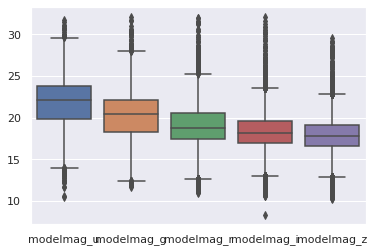

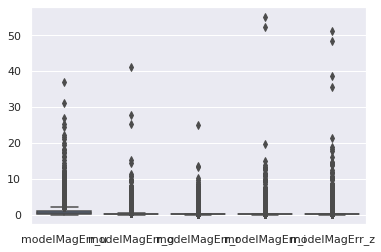

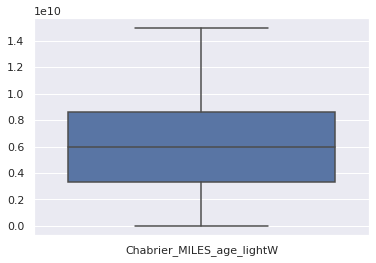

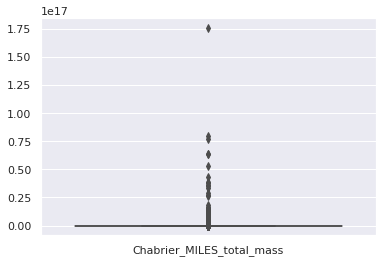

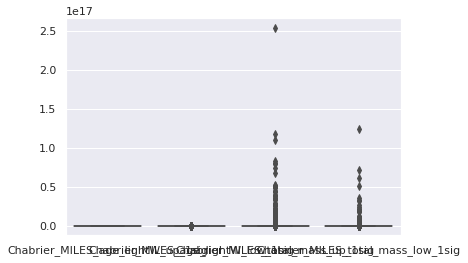

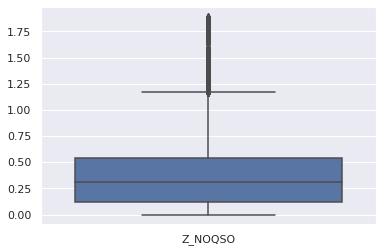

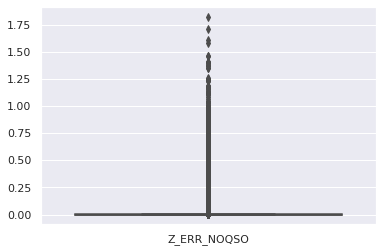

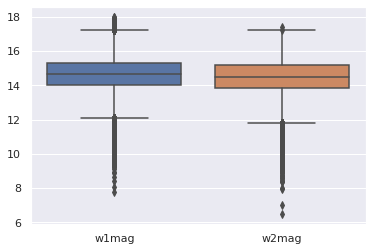

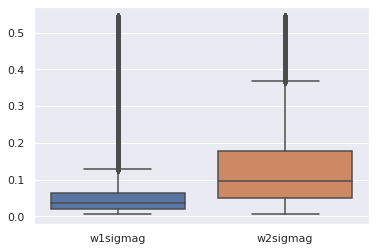

<Figure size 432x288 with 0 Axes>

In [7]:
# Visualización de outliers
plt.figure()
sns.boxplot(data=sdss_f[['modelmag_u','modelmag_g','modelmag_r','modelmag_i','modelmag_z']])
plt.figure()
sns.boxplot(data=sdss_f[['modelMagErr_u',
        'modelMagErr_g','modelMagErr_r','modelMagErr_i','modelMagErr_z']])
plt.figure()
sns.boxplot(data=sdss_f[['Chabrier_MILES_age_lightW']])
plt.figure()
sns.boxplot(data=sdss_f[['Chabrier_MILES_total_mass']])
plt.figure()
sns.boxplot(data=sdss_f[['Chabrier_MILES_age_lightW_up_1sig',
        'Chabrier_MILES_age_lightW_low_1sig',
        'Chabrier_MILES_total_mass_up_1sig',
        'Chabrier_MILES_total_mass_low_1sig']])
plt.figure()
sns.boxplot(data=sdss_f[['Z_NOQSO']])
plt.figure()
sns.boxplot(data=sdss_f[['Z_ERR_NOQSO']])
plt.figure()
sns.boxplot(data=sdss_f[['w1mag','w2mag']])
plt.figure()
sns.boxplot(data=sdss_f[['w1sigmag','w2sigmag']])
plt.figure()

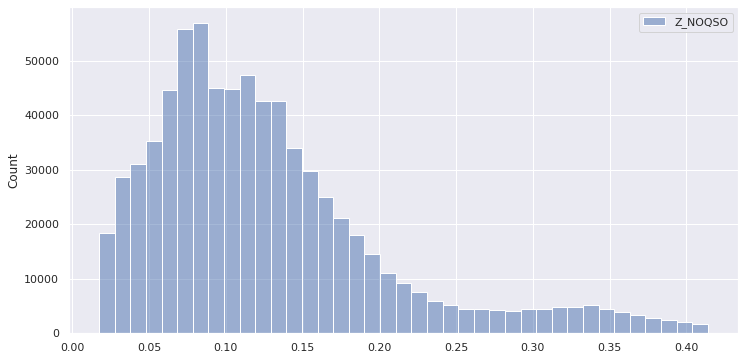

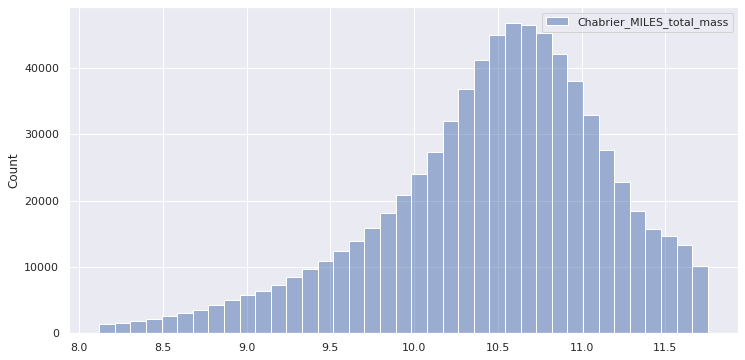

In [58]:
# Distribuciones de las características objetivos (redshift y masa)
lista = ['Z_NOQSO','Chabrier_MILES_total_mass']
for i in lista:
    limsup = np.quantile(np.array(sdss_f[i]),q=0.99)
    liminf = np.quantile(np.array(sdss_f[i]),q=0.01)
    bines= np.linspace(liminf,limsup,40)
    plt.figure(figsize=(12,6))
    sns.histplot(sdss_f[[i]],bins=bines)

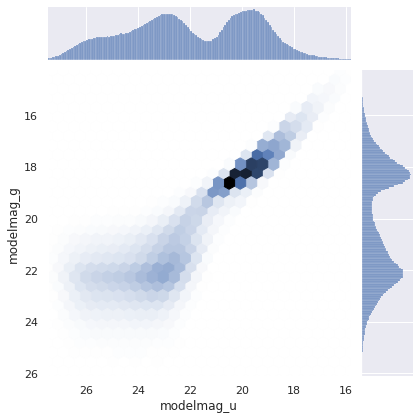

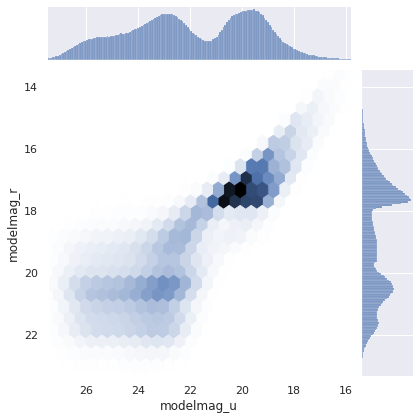

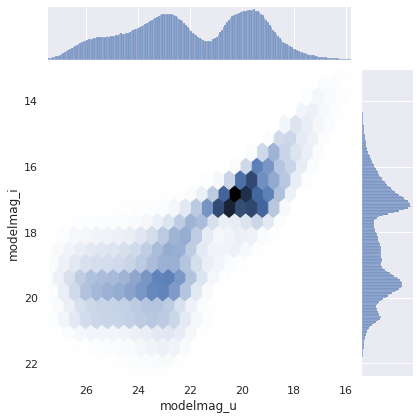

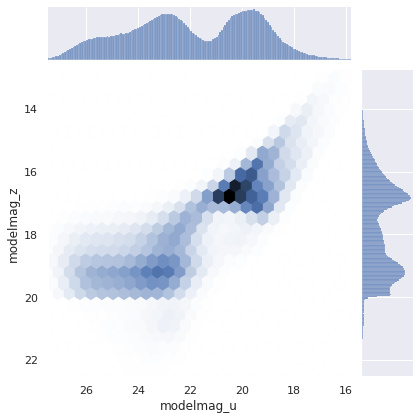

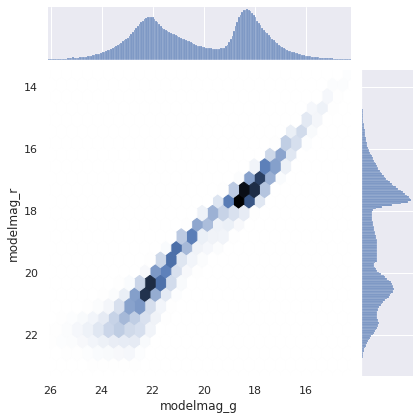

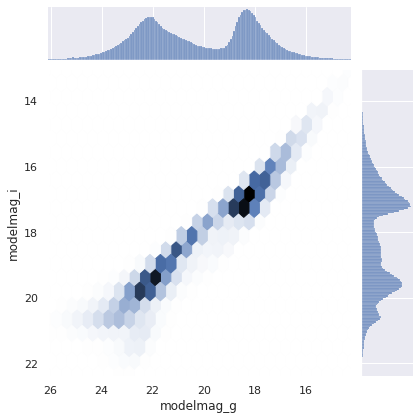

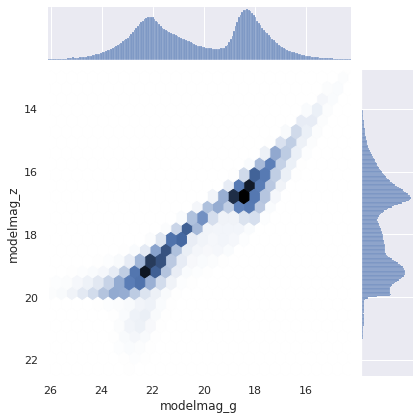

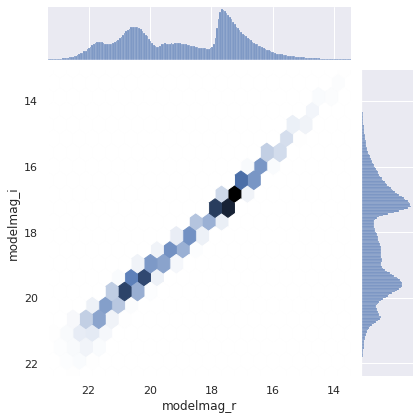

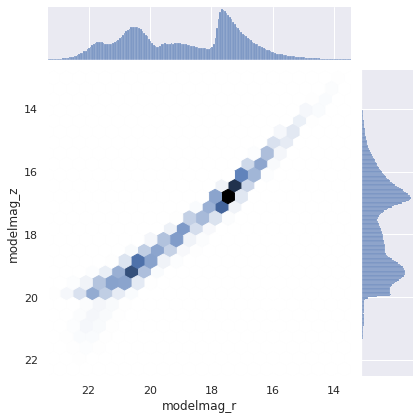

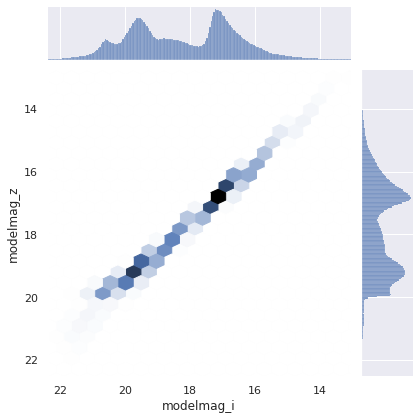

In [8]:
# Distribuciones de las magnitudes u, g, r, i, z
limsup_u = np.quantile(np.array(sdss_f['modelmag_u']),q=0.999)
liminf_u = np.quantile(np.array(sdss_f['modelmag_u']),q=0.001)
limsup_g = np.quantile(np.array(sdss_f['modelmag_g']),q=0.999)
liminf_g = np.quantile(np.array(sdss_f['modelmag_g']),q=0.001)
limsup_r = np.quantile(np.array(sdss_f['modelmag_r']),q=0.999)
liminf_r = np.quantile(np.array(sdss_f['modelmag_r']),q=0.001)
limsup_i = np.quantile(np.array(sdss_f['modelmag_i']),q=0.999)
liminf_i = np.quantile(np.array(sdss_f['modelmag_i']),q=0.001)
limsup_z = np.quantile(np.array(sdss_f['modelmag_z']),q=0.999)
liminf_z = np.quantile(np.array(sdss_f['modelmag_z']),q=0.001)
sns.jointplot(x=sdss_f['modelmag_u'],y=sdss_f['modelmag_g'],kind='hex',
              xlim=(limsup_u,liminf_u),ylim=(limsup_g,liminf_g))
sns.jointplot(x=sdss_f['modelmag_u'],y=sdss_f['modelmag_r'],kind='hex',
              xlim=(limsup_u,liminf_u),ylim=(limsup_r,liminf_r))
sns.jointplot(x=sdss_f['modelmag_u'],y=sdss_f['modelmag_i'],kind='hex',
              xlim=(limsup_u,liminf_u),ylim=(limsup_i,liminf_i))
sns.jointplot(x=sdss_f['modelmag_u'],y=sdss_f['modelmag_z'],kind='hex',
              xlim=(limsup_u,liminf_u),ylim=(limsup_z,liminf_z))
sns.jointplot(x=sdss_f['modelmag_g'],y=sdss_f['modelmag_r'],kind='hex',
              xlim=(limsup_g,liminf_g),ylim=(limsup_r,liminf_r))
sns.jointplot(x=sdss_f['modelmag_g'],y=sdss_f['modelmag_i'],kind='hex',
              xlim=(limsup_g,liminf_g),ylim=(limsup_i,liminf_i))
sns.jointplot(x=sdss_f['modelmag_g'],y=sdss_f['modelmag_z'],kind='hex',
              xlim=(limsup_g,liminf_g),ylim=(limsup_z,liminf_z))
sns.jointplot(x=sdss_f['modelmag_r'],y=sdss_f['modelmag_i'],kind='hex',
              xlim=(limsup_r,liminf_r),ylim=(limsup_i,liminf_i))
sns.jointplot(x=sdss_f['modelmag_r'],y=sdss_f['modelmag_z'],kind='hex',
              xlim=(limsup_r,liminf_r),ylim=(limsup_z,liminf_z))
sns.jointplot(x=sdss_f['modelmag_i'],y=sdss_f['modelmag_z'],kind='hex',
              xlim=(limsup_i,liminf_i),ylim=(limsup_z,liminf_z))

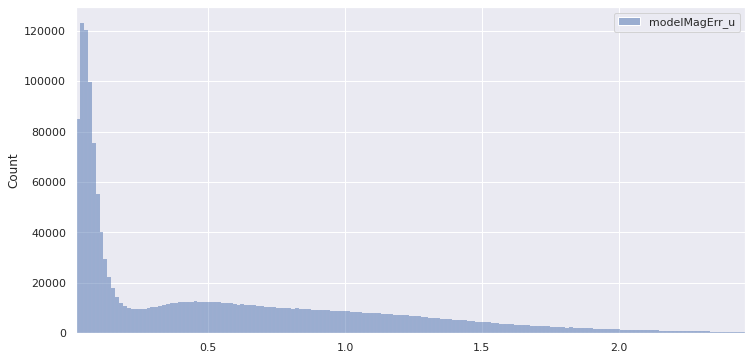

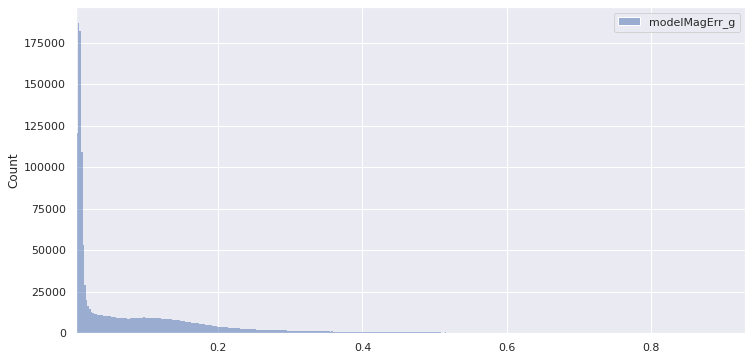

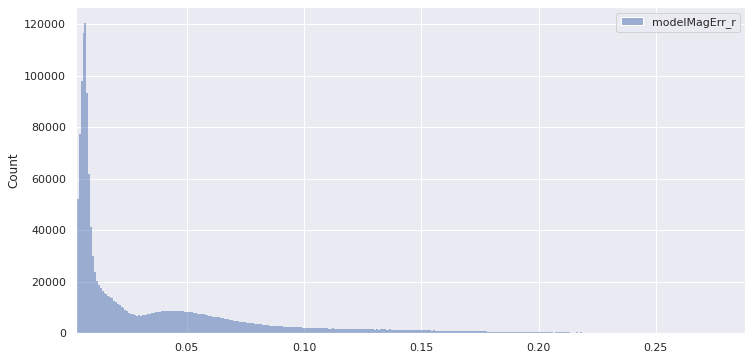

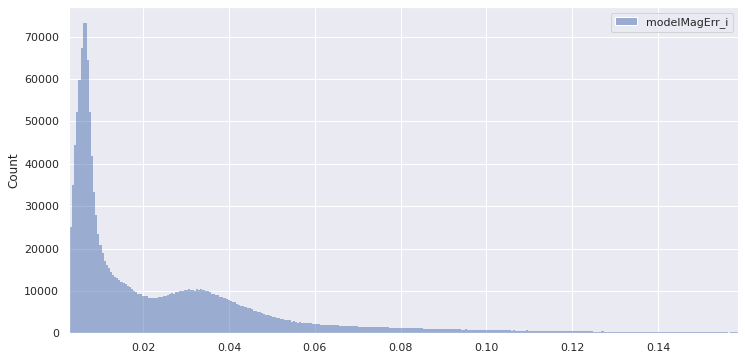

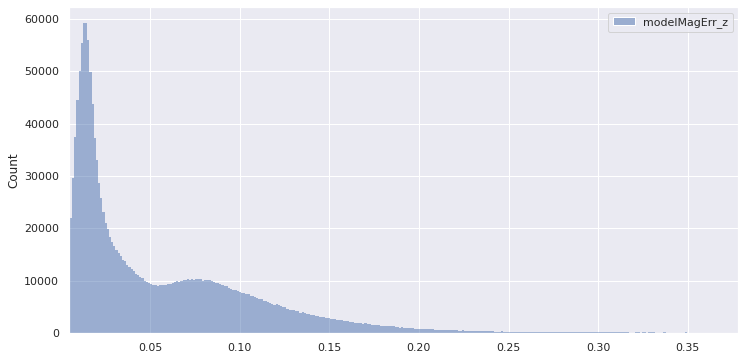

In [6]:
# Distribuciones de los errores de las magnitudes u, g, r, i, z
lista = ['modelMagErr_u','modelMagErr_g','modelMagErr_r','modelMagErr_i','modelMagErr_z']
for i in lista:
    limsup = np.quantile(np.array(sdss_f[i]),q=0.99)
    liminf = np.quantile(np.array(sdss_f[i]),q=0.01)
    plt.figure(figsize=(12,6))
    g = sns.histplot(sdss_f[[i]])
    g.set_xlim(liminf,limsup)

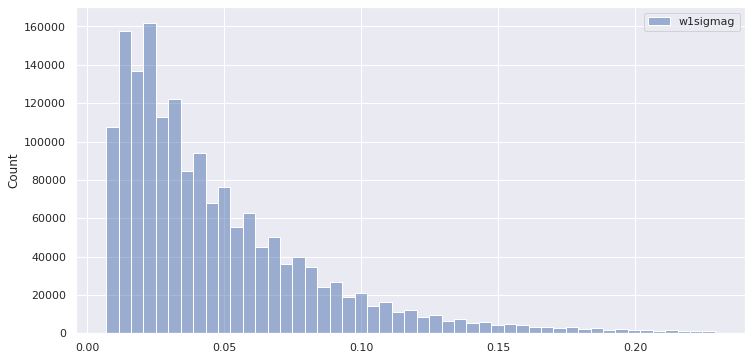

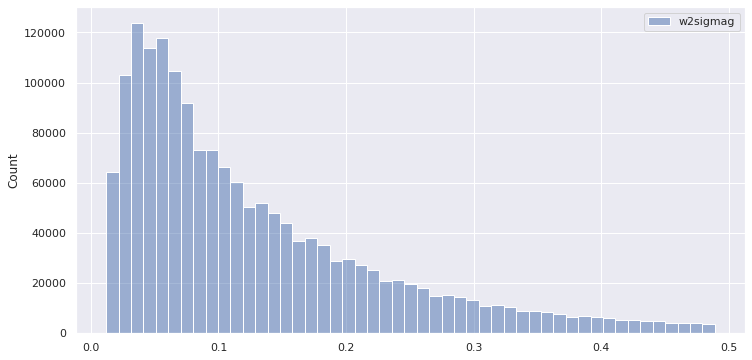

In [10]:
# Distribuciones de errores en w1 y w2
lista = ['w1sigmag','w2sigmag']
for i in lista:
    limsup = np.quantile(np.array(sdss_f[i]),q=0.99)
    liminf = np.quantile(np.array(sdss_f[i]),q=0.01)
    bines= np.linspace(liminf,limsup,50)
    plt.figure(figsize=(12,6))
    sns.histplot(sdss_f[[i]],bins=bines)

In [18]:
# Se calculan los colores y sus errores
sdss_f['u-g'] = sdss_f['modelmag_u'] - sdss_f['modelmag_g']
sdss_f['g-r'] = sdss_f['modelmag_g'] - sdss_f['modelmag_r']
sdss_f['r-i'] = sdss_f['modelmag_r'] - sdss_f['modelmag_i']
sdss_f['i-z'] = sdss_f['modelmag_i'] - sdss_f['modelmag_z']
sdss_f['r-w1'] = sdss_f['modelmag_r'] - sdss_f['w1mag']
sdss_f['u-g_err'] = np.sqrt(sdss_f['modelMagErr_u']**2 + sdss_f['modelMagErr_g']**2)
sdss_f['g-r_err'] = np.sqrt(sdss_f['modelMagErr_g']**2 + sdss_f['modelMagErr_r']**2)
sdss_f['r-i_err'] = np.sqrt(sdss_f['modelMagErr_r']**2 + sdss_f['modelMagErr_i']**2)
sdss_f['i-z_err'] = np.sqrt(sdss_f['modelMagErr_i']**2 + sdss_f['modelMagErr_z']**2)
sdss_f['r-w1_err'] = np.sqrt(sdss_f['modelMagErr_r']**2 + sdss_f['w1sigmag']**2)
morfologia = False
if morfologia:
    sdss_f['cr'] = sdss_f['petroR50_r'] / sdss_f['petroR90_r']
    sdss_f['cg'] = sdss_f['petroR50_g'] / sdss_f['petroR90_g']

In [399]:
#sdss_f = Table.from_pandas(sdss_f)
#sdss_f.write('sdss_firefly.fits', overwrite='True')

In [19]:
ind_var = sdss_f.drop(['objid', 'Chabrier_MILES_age_lightW',
       'Chabrier_MILES_age_lightW_up_1sig',
       'Chabrier_MILES_age_lightW_low_1sig', 'Chabrier_MILES_total_mass',
       'Chabrier_MILES_total_mass_up_1sig',
       'Chabrier_MILES_total_mass_low_1sig', 'Z_NOQSO', 'Z_ERR_NOQSO'], axis=1)

### Análisis PCA 

In [8]:
ss = StandardScaler()
datanorm = ss.fit_transform(ind_var)
ind_var.columns

Index(['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
       'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
       'modelMagErr_z', 'w1mag', 'w2mag', 'w1sigmag', 'w2sigmag', 'u-g', 'g-r',
       'r-i', 'i-z', 'u-g_err', 'g-r_err', 'r-i_err', 'i-z_err'],
      dtype='object')

In [9]:
pca = PCA()
pca.fit(datanorm)
comp = pca.transform(datanorm)
mean = pca.mean_
components = pca.components_
var = pca.explained_variance_ratio_
var = np.cumsum(var)

Text(0, 0.5, '% Varianza Acumulada')

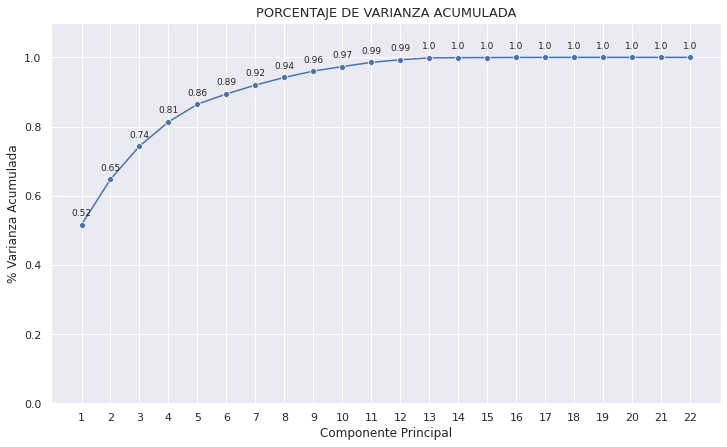

In [10]:
# Gráfico de las componentes principales
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
fig = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

ax = sns.lineplot(x=np.arange(len(var)) + 1, y=var, marker='o', data=pca, 
                  legend='brief')

for x, y in zip(np.arange(len(var))+1, var):
    label = round(y, 2)
    ax.annotate(round(y, 2), (x,y), textcoords="offset points", xytext=(0,9), ha='center', fontsize=9)

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_)+1)
ax.set_title('PORCENTAJE DE VARIANZA ACUMULADA', fontsize=13)
ax.set_xlabel('Componente Principal')
ax.set_ylabel('% Varianza Acumulada')

In [11]:
pca = PCA(n_components=13)
pca.fit(datanorm)
comp = pca.transform(datanorm)

componentes = pd.DataFrame(abs(pca.components_),columns=ind_var.columns)
componentes

,modelmag_u,modelmag_g,modelmag_r,modelmag_i,modelmag_z,modelMagErr_u,modelMagErr_g,modelMagErr_r,modelMagErr_i,modelMagErr_z,...,w1sigmag,w2sigmag,u-g,g-r,r-i,i-z,u-g_err,g-r_err,r-i_err,i-z_err
0,0.246546,0.282715,0.284450,0.281473,0.274951,0.204000,0.220431,0.192493,0.119457,0.150976,...,0.197778,0.215141,0.033300,0.172098,0.224434,0.144494,0.217804,0.225793,0.166622,0.153280
1,0.236418,0.126093,0.083374,0.068276,0.081093,0.207068,0.107598,0.301179,0.415133,0.229462,...,0.025881,0.027043,0.256107,0.221303,0.132637,0.048024,0.171404,0.176868,0.421713,0.387022
2,0.121123,0.012942,0.077503,0.117544,0.169600,0.242815,0.209321,0.132223,0.120925,0.127047,...,0.358240,0.316231,0.233823,0.308731,0.130836,0.255717,0.265459,0.215297,0.152889,0.019273
3,0.184732,0.063732,0.042542,0.014861,0.033966,0.261721,0.287461,0.102125,0.190390,0.336029,...,0.010882,0.032688,0.522421,0.110522,0.161558,0.287361,0.212756,0.257350,0.077380,0.367740
4,0.101423,0.012295,0.030645,0.069418,0.008249,0.036944,0.265874,0.030157,0.358897,0.506040,...,0.096836,0.104203,0.241742,0.150446,0.159541,0.474466,0.076699,0.213792,0.254000,0.179276
5,0.060620,0.189148,0.081002,0.136641,0.119756,0.176014,0.052577,0.500209,0.267627,0.084434,...,0.217613,0.181805,0.245828,0.478419,0.201548,0.149297,0.179121,0.178555,0.064109,0.239485
6,0.226444,0.142355,0.202310,0.140975,0.173876,0.367276,0.196098,0.266914,0.073117,0.044765,...,0.295542,0.264333,0.202434,0.109697,0.437919,0.136300,0.380999,0.092303,0.089286,0.010673
7,0.197360,0.042645,0.114522,0.097285,0.135153,0.383006,0.287701,0.047104,0.118121,0.172315,...,0.257326,0.223992,0.507592,0.212052,0.165733,0.181549,0.306847,0.228303,0.112093,0.061314
8,0.028062,0.005815,0.097850,0.113905,0.002581,0.085899,0.136230,0.023100,0.294745,0.399451,...,0.060713,0.147151,0.071680,0.302213,0.003059,0.685540,0.048622,0.131698,0.214752,0.107181
9,0.021603,0.037922,0.029165,0.147619,0.161481,0.020548,0.246534,0.073279,0.104870,0.014517,...,0.340305,0.390129,0.121616,0.246819,0.535094,0.023934,0.041133,0.238092,0.057851,0.090373


In [12]:
comp2 = pd.DataFrame(componentes.max(),columns=['max']).sort_values(by=['max'],ascending=False)
comp2

,max
i-z,0.685540
w1sigmag,0.684731
w2sigmag,0.591065
modelMagErr_r,0.579059
r-i,0.535094
u-g,0.522421
modelMagErr_z,0.506040
g-r,0.495909
w2mag,0.456677
w1mag,0.440091


In [13]:
comp2['indice'] = np.arange(len(comp2))
comp3 = comp2[(comp2.indice <= 12)]
comp3.index

Index(['i-z', 'w1sigmag', 'w2sigmag', 'modelMagErr_r', 'r-i', 'u-g',
       'modelMagErr_z', 'g-r', 'w2mag', 'w1mag', 'r-i_err', 'modelMagErr_i',
       'i-z_err'],
      dtype='object')

# Entrenamiento

In [60]:
ind_var.columns

Index(['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
       'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
       'modelMagErr_z', 'w1mag', 'w2mag', 'w1sigmag', 'w2sigmag', 'u-g', 'g-r',
       'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err', 'i-z_err',
       'r-w1_err'],
      dtype='object')

In [81]:
pca_on = 2
if pca_on == 1:
    ind_var = ind_var[['i-z', 'w1sigmag', 'w2sigmag', 'modelMagErr_r', 'r-i', 'u-g',
           'modelMagErr_z', 'g-r', 'w2mag', 'w1mag', 'r-i_err', 'modelMagErr_i',
           'i-z_err']]
elif pca_on == 2:
    ind_var = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
       'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
       'modelMagErr_z', 'w1mag', 'w2mag', 'w1sigmag', 'w2sigmag','petroR50Err_g',
       'petroR50Err_r', 'petroR90Err_g', 'petroR90Err_r', 'u-g', 'g-r', 'r-i',
       'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err', 'i-z_err', 'r-w1_err',
       'cr', 'cg']]
elif pca_on == 3:
    ind_var = sdss_f.drop(['objid', 'Chabrier_MILES_age_lightW',
           'Chabrier_MILES_age_lightW_up_1sig',
           'Chabrier_MILES_age_lightW_low_1sig', 'Chabrier_MILES_total_mass',
           'Chabrier_MILES_total_mass_up_1sig',
           'Chabrier_MILES_total_mass_low_1sig', 'Z_ERR_NOQSO'], axis=1)
    ind_var = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i',
       'modelmag_z','Z_NOQSO']]
    ind_var_err = sdss_f.drop(['objid', 'Chabrier_MILES_age_lightW',
       'Chabrier_MILES_age_lightW_up_1sig',
       'Chabrier_MILES_age_lightW_low_1sig', 'Chabrier_MILES_total_mass',
       'Chabrier_MILES_total_mass_up_1sig',
       'Chabrier_MILES_total_mass_low_1sig', 'Z_NOQSO'], axis=1)
    ind_var_err = ind_var_err[['modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
       'modelMagErr_z','Z_ERR_NOQSO']]

In [20]:
morf_on = False
if morf_on == True:
    dep_var = sdss_f.drop(['objid', 'modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i',
           'modelmag_z', 'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r',
           'modelMagErr_i', 'modelMagErr_z',
           'Chabrier_MILES_age_lightW_low_1sig',
           'Chabrier_MILES_age_lightW_up_1sig','Z_ERR_NOQSO', 'w1mag',
           'w2mag', 'w1sigmag', 'w2sigmag',
           'Chabrier_MILES_total_mass_up_1sig',
           'Chabrier_MILES_total_mass_low_1sig','i-z', 'w1sigmag', 'w2sigmag', 'modelMagErr_r', 'r-i', 
           'u-g', 'modelMagErr_z', 'g-r', 'w2mag', 'w1mag', 'r-i_err', 'modelMagErr_i',
           'i-z_err','u-g_err','g-r_err','r-w1','r-w1_err'
                          ,'petroR50_g','petroR50_r','petroR90_g','petroR90_r','petroR50Err_g',
                          'petroR50Err_r','petroR90Err_g','petroR90Err_r','cr','cg',
                           'Chabrier_MILES_age_lightW'], axis=1)
else:
    dep_var = sdss_f.drop(['objid', 'modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i',
           'modelmag_z', 'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r',
           'modelMagErr_i', 'modelMagErr_z',
           'Chabrier_MILES_age_lightW_low_1sig', 'Chabrier_MILES_age_lightW',
           'Chabrier_MILES_age_lightW_up_1sig','Z_ERR_NOQSO', 'w1mag',
           'w2mag', 'w1sigmag', 'w2sigmag',
           'Chabrier_MILES_total_mass_up_1sig',
           'Chabrier_MILES_total_mass_low_1sig','i-z', 'w1sigmag', 'w2sigmag', 'modelMagErr_r', 'r-i', 
           'u-g', 'modelMagErr_z', 'g-r', 'w2mag', 'w1mag', 'r-i_err', 'modelMagErr_i',
           'i-z_err','u-g_err','g-r_err','r-w1','r-w1_err'], axis=1)

In [21]:
print(dep_var)

         Chabrier_MILES_total_mass   Z_NOQSO
0                        11.700626  0.868302
1                        10.625238  0.179807
2                        11.341197  0.303022
3                        10.920016  0.166514
4                        11.224444  0.187003
...                            ...       ...
1823934                  11.163956  0.698667
1823935                  10.663449  0.476378
1823936                  10.035265  0.205782
1823938                   9.188698  0.572639
1823939                  10.933963  0.768771

[1706024 rows x 2 columns]


In [22]:
print(ind_var)

         modelmag_u  modelmag_g  modelmag_r  modelmag_i  modelmag_z  \
0          23.54913    24.84364    21.79697    20.66471    19.79499   
1          19.32471    17.98649    17.13704    16.66832    16.43091   
2          22.72299    20.14831    18.48540    17.88889    17.49878   
3          21.25408    18.69231    17.52877    17.00742    16.62943   
4          21.06138    18.98770    17.73405    17.24126    16.84012   
...             ...         ...         ...         ...         ...   
1823934    25.64736    22.88043    21.14453    19.97628    19.09867   
1823935    26.95768    22.18807    20.70633    19.74285    19.30593   
1823936    20.90875    19.16051    17.77566    17.18570    16.80642   
1823938    26.04261    22.10111    20.33430    19.28917    18.57008   
1823939    26.80129    23.55986    21.90257    20.63126    19.80244   

         modelMagErr_u  modelMagErr_g  modelMagErr_r  modelMagErr_i  \
0             1.283621       1.012440       0.169086       0.084650   
1    

In [227]:
print(ind_var_err)

        modelMagErr_u  modelMagErr_g  modelMagErr_r  modelMagErr_i  \
0            0.064935       0.007983       0.005424       0.005275   
1            0.028494       0.005816       0.005567       0.006822   
2            0.055517       0.009701       0.007759       0.008266   
4            0.019610       0.003409       0.002713       0.002651   
5            0.261244       0.012263       0.006806       0.006556   
...               ...            ...            ...            ...   
845374       0.088861       0.010485       0.007577       0.007133   
845375       0.081187       0.006568       0.004653       0.004416   
845376       0.064119       0.005915       0.004680       0.004631   
845377       0.101579       0.010684       0.007191       0.007568   
845378       0.081201       0.010083       0.006473       0.006681   

        modelMagErr_z  Z_ERR_NOQSO  
0            0.011901     0.000021  
1            0.016684     0.000006  
2            0.020395     0.000012  
4          

In [23]:
modelo = RandomForestRegressor()
modelo.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'random_state',
 'ccp_alpha')

In [24]:
ind_vars_train, ind_vars_test, dep_vars_train, dep_vars_test = train_test_split(ind_var, 
                                                                                dep_var,
                                                                                random_state=3210,
                                                                                shuffle=True)

In [329]:
ind_vars_train

,modelmag_u,modelmag_g,modelmag_r,modelmag_i,modelmag_z
0,19.870950,18.114920,17.356890,17.015550,16.772670
1,21.244310,19.097690,17.613040,17.066440,16.720270
2,19.440080,17.559890,16.594920,16.177530,15.825790
3,19.761490,17.638070,16.669990,16.243070,15.882950
4,20.297870,18.556280,17.740430,17.337190,17.074090
...,...,...,...,...,...
6198847,20.477273,18.568353,17.647087,17.154795,16.744734
6198848,21.279094,18.940413,17.714595,17.220918,16.861542
6198849,22.107477,19.508114,17.928654,17.491020,17.049132
6198850,19.225357,17.312777,16.566985,16.189085,15.903405


In [330]:
dep_vars_train

,Z_NOQSO
0,0.032717
1,0.244616
2,0.100785
3,0.093026
4,0.095679
...,...
6198847,0.040961
6198848,0.184559
6198849,0.245525
6198850,0.053868


In [328]:
ind_vars_train_err

,modelMagErr_u,modelMagErr_g,modelMagErr_r,modelMagErr_i,modelMagErr_z,Z_ERR_NOQSO
477997,0.131484,0.012723,0.009713,0.009352,0.023791,0.000044
481728,0.293043,0.018601,0.008557,0.007513,0.016871,0.000056
398959,0.052067,0.005675,0.004185,0.003991,0.008466,0.000021
413124,0.064808,0.006345,0.004581,0.004445,0.009621,0.000023
707721,0.057899,0.008376,0.006338,0.006512,0.016351,0.000012
...,...,...,...,...,...,...
301798,0.122866,0.010068,0.007639,0.006957,0.017530,0.000020
817860,0.152305,0.011891,0.006887,0.007084,0.016110,0.000034
487266,0.331102,0.020943,0.008966,0.008570,0.016208,0.000070
348559,0.036393,0.005441,0.004283,0.004310,0.008906,0.000014


In [282]:
%%time
# Usando los errores para generar distribuciones
ind_vars_train_err, ind_vars_test_err, dep_vars_train, dep_vars_test = train_test_split(ind_var_err, 
                                                                                dep_var,
                                                                                random_state=3210,
                                                                                shuffle=True)
a = np.array(ind_vars_train)
b = np.array(ind_vars_train_err)
np.random.seed(3210)
fakes = 10# Cantidad de datos a crear por galaxia
col = 6# Cantidad de columnas con errores
nsam = 563532# Cantidad de galaxias en la muestra
for k in range(fakes):
    for i in range(nsam):
        print('Vuelta: ', k, 'galaxia: ', i)
            var = np.zeros([1, col ])
            for j in range(col):
                var[0,j] = np.random.normal(a[i,j],b[i,j],1)
            a = np.concatenate((a,var),axis=0)
ind_vars_train = pd.DataFrame()
ind_vars_train['modelmag_u'] = a[:,0]
ind_vars_train['modelmag_g'] = a[:,1]
ind_vars_train['modelmag_r'] = a[:,2]
ind_vars_train['modelmag_i'] = a[:,3]
ind_vars_train['modelmag_z'] = a[:,4]
dep_vars_train = pd.DataFrame()
dep_vars_train['Z_NOQSO'] = a[:,5]

In [25]:
%%time
model_fit = modelo.fit(ind_vars_train, dep_vars_train)

CPU times: user 1h 3min 40s, sys: 876 ms, total: 1h 3min 41s
Wall time: 1h 3min 41s


In [26]:
%%time
model_pred = model_fit.predict(ind_vars_test)

CPU times: user 28.3 s, sys: 28 ms, total: 28.3 s
Wall time: 28.3 s


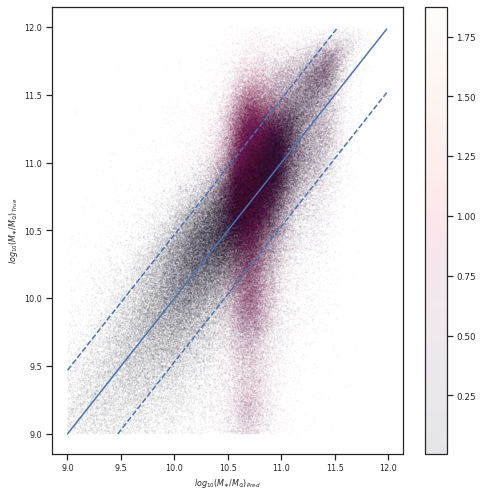

In [35]:
# Cortar los datos en un cuadro 2d
x = model_pred[:,0]
y = dep_vars_test['Chabrier_MILES_total_mass']
z = dep_vars_test['Z_NOQSO']
mascara = (x < 12) & (x > 9) & (y < 12) & (y > 9)
x = x[mascara]
y = y[mascara]
z = z[mascara]

ztest = dep_vars_test['Chabrier_MILES_total_mass']
zpred = model_pred[:,0]
rms = np.sqrt(np.mean((ztest - zpred) ** 2))

import matplotlib.colors as mcolors
gamma = 0.5

plt.figure(figsize=(7,7))
plt.scatter(x, y, alpha=0.1, marker='.', s=0.2, c=z)
plt.colorbar()
plt.plot([x.min(),x.max()], [x.min(),x.max()], color='b')
plt.plot([x.min(),x.max() - rms], [x.min() + rms,x.max()], ls='--', color='b')
plt.plot([x.min() + rms,x.max()], [y.min(),x.max() - rms], ls='--', color='b')
plt.xlabel(r'$log_{10}(M_{\ast} / M_{\odot})_{Pred}$',fontsize='small')
plt.ylabel(r'$log_{10}(M_{\ast} / M_{\odot})_{True}$',fontsize='small')
plt.xticks(fontsize='small')
plt.yticks(fontsize='small')
plt.tight_layout()
#plt.xlim(right=12)
#plt.xlim(left=9.5)
#plt.ylim(top=12)
#plt.ylim(bottom=9)
#plt.savefig('mass_vs_mass.jpg')
plt.show()

In [313]:
# Para controlar la acumulación de objetos del gráfico anterior
x = model_pred[:,0]
y = dep_vars_test['Chabrier_MILES_total_mass']
ztest = dep_vars_test['Chabrier_MILES_total_mass']
zpred = model_pred[:,0]
rms = np.sqrt(np.mean((ztest - zpred) ** 2))
x1 = 7 
x2 = x.max()
y1 = 7 + rms
y2 = x.max() + rms
xnew1 = np.linspace(x1,x2,len(y))
ynew1 = (y2 - y1) / (x2 - x1) * (xnew1 - x1) + y1  

x1 = 7 
x2 = x.max()
y1 = 7 - rms
y2 = x.max() - rms
xnew2 = np.linspace(x1,x2,len(y))
ynew2 = (y2 - y1) / (x2 - x1) * (xnew2 - x1) + y1  

x1 = 7 
x2 = x.max()
y1 = 7
y2 = x.max()
xnew3 = np.linspace(x1,x2,len(y))
ynew3 = (y2 - y1) / (x2 - x1) * (xnew3 - x1) + y1  

x = model_pred[:,1]
y = dep_vars_test['Z_NOQSO']
ztest = dep_vars_test['Z_NOQSO']
zpred = model_pred[:,1]
rms = np.sqrt(np.mean((ztest - zpred) ** 2))
x1 = 0
x2 = x.max()
y1 = 0 + rms
y2 = x.max() + rms
xnew4 = np.linspace(x1,x2,len(y))
ynew4 = (y2 - y1) / (x2 - x1) * (xnew4 - x1) + y1

x1 = 0 
x2 = x.max()
y1 = 0 - rms
y2 = x.max() - rms
xnew5 = np.linspace(x1,x2,len(y))
ynew5 = (y2 - y1) / (x2 - x1) * (xnew5 - x1) + y1

x1 = 0
x2 = x.max()
y1 = 0
y2 = x.max()
xnew6 = np.linspace(x1,x2,len(y))
ynew6 = (y2 - y1) / (x2 - x1) * (xnew6 - x1) + y1  

a = np.arange(1706024)
xtr, xt, ytr, yt = train_test_split(a, 
                                    a,
                                    random_state=3210,
                                    shuffle=True)
hhh = pd.DataFrame()
hhh = sdss_f.iloc[yt]
hhh['masspred'] = model_pred[:,0]
hhh['zpred'] = model_pred[:,1]
hhh['massrms_x'] = xnew1
hhh['massrms_up'] = ynew1
hhh['massrms_down'] = ynew2
hhh['massrms_cen'] = ynew3
hhh['zrms_x'] = xnew4
hhh['zrms_up'] = ynew4
hhh['zrms_down'] = ynew5
hhh['zrms_cen'] = ynew6
hhh = Table.from_pandas(hhh)
hhh.write('hhh.fits', overwrite=True)

/tmp/ipykernel_5859/2896935116.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hhh['masspred'] = model_pred[:,0]
/tmp/ipykernel_5859/2896935116.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hhh['zpred'] = model_pred[:,1]
/tmp/ipykernel_5859/2896935116.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

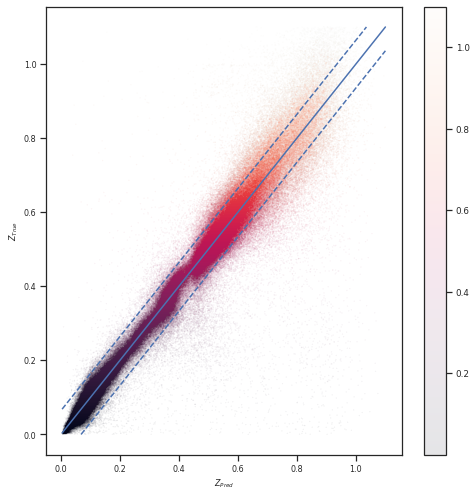

In [36]:
x = model_pred[:,1]
y = dep_vars_test['Z_NOQSO']
mascara = (x < 1.1) & (y < 1.1)
x = x[mascara]
y = y[mascara]

ztest = dep_vars_test['Z_NOQSO']
zpred = model_pred[:,1]
rms = np.sqrt(np.mean((ztest - zpred) ** 2))

import matplotlib.colors as mcolors
gamma = 0.2

plt.figure(figsize=(7,7))
plt.scatter(x, y, alpha=0.1, marker='.', s=0.2, c=y)
plt.colorbar()
plt.plot([x.min(),x.max()], [x.min(),x.max()], color='b')
plt.plot([x.min(),x.max() - rms], [x.min() + rms,x.max()], ls='--', color='b')
plt.plot([x.min() + rms,x.max()], [y.min(),x.max() - rms], ls='--', color='b')
plt.xlabel(r'$Z_{Pred}$',fontsize='small')
plt.ylabel(r'$Z_{True}$',fontsize='small')
plt.xticks(fontsize='small')
plt.yticks(fontsize='small')
plt.tight_layout()
#plt.xlim(right=12)
#plt.xlim(left=9.5)
#plt.ylim(top=12)
#plt.ylim(bottom=9)
plt.savefig('z_vs_z.jpg')
plt.show()

0.9379266085000075
4.3792069650000004e-05


<AxesSubplot:xlabel='Chabrier_MILES_total_mass', ylabel='Count'>

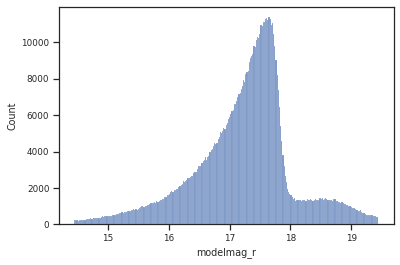

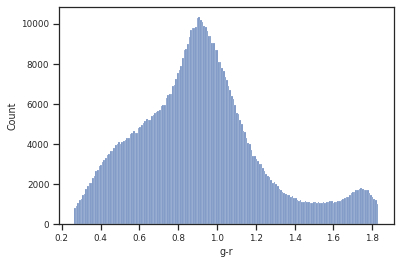

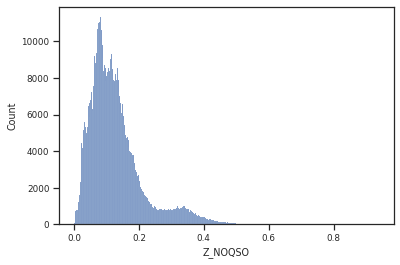

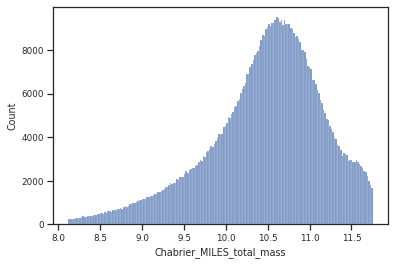

In [357]:
plt.figure()
limsup_r = np.quantile(np.array(sdss_f['modelmag_r']),q=0.99)
liminf_r = np.quantile(np.array(sdss_f['modelmag_r']),q=0.01)
sns.histplot(sdss_f['modelmag_r'],binrange=[liminf_r,limsup_r])
plt.figure()
limsup_r = np.quantile(np.array(sdss_f['g-r']),q=0.99)
liminf_r = np.quantile(np.array(sdss_f['g-r']),q=0.01)
sns.histplot(sdss_f['g-r'],binrange=[liminf_r,limsup_r])
plt.figure()
limsup_r = np.quantile(np.array(sdss_f['Z_NOQSO']),q=0.99999)
liminf_r = np.quantile(np.array(sdss_f['Z_NOQSO']),q=0.00001)
print(limsup_r)
print(liminf_r)
sns.histplot(sdss_f['Z_NOQSO'],binrange=[liminf_r,limsup_r])
plt.figure()
limsup_r = np.quantile(np.array(sdss_f['Chabrier_MILES_total_mass']),q=0.99)
liminf_r = np.quantile(np.array(sdss_f['Chabrier_MILES_total_mass']),q=0.01)
sns.histplot(sdss_f['Chabrier_MILES_total_mass'],binrange=[liminf_r,limsup_r])

In [257]:
    cantbin = 5
    limsup_r4 = np.quantile(np.array(sdss_f['Chabrier_MILES_total_mass']),q=0.99)
    liminf_r4 = np.quantile(np.array(sdss_f['Chabrier_MILES_total_mass']),q=0.01)
    bines = np.linspace(liminf_r4,limsup_r4,cantbin + 1)
    bines

array([ 8.5009988 ,  9.15552252,  9.81004623, 10.46456995, 11.11909366,
       11.77361738])

[0.3573354  0.35536537 0.40487972 0.54594419 0.63189733]
[0.35006109 0.34934066 0.40097496 0.5446013  0.63011684]
[0.34840165 0.34673323 0.39930815 0.54396945 0.62935976]
[15.69607215 17.18957185 18.68307155 20.17657125 21.67007095]
22.4168208
14.9493223
[0.43268342 0.43687974 0.50006003 0.61306677]
[0.43281903 0.43707289 0.49998726 0.61401079]
[0.43276179 0.43681617 0.49992628 0.61368069]
[0.600762  1.2625522 1.9243424 2.5861326]
2.9170277000000007
0.26986690000000024
[0.34341856 0.43894424 0.56616332 0.58381256]
[0.34355917 0.43917311 0.56568136 0.58425439]
[0.34349985 0.43881555 0.56578443 0.58457238]
[0.14228149 0.38068994 0.61909839 0.85750684]
0.976711063
0.0230772645
[0.16398836 0.18119204 0.17399698 0.16838627 0.14901481]
[0.16434154 0.18119979 0.17405007 0.16842097 0.14898151]
[0.1639697  0.18096144 0.17395437 0.16841603 0.14898429]
[ 8.82826066  9.48278438 10.13730809 10.79183181 11.44635552]
11.773617379401323
8.500998802009889
CPU times: user 9h 52min 48s, sys: 6.76 s, tota

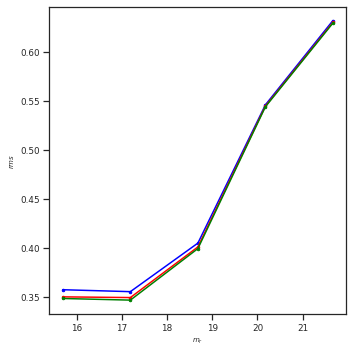

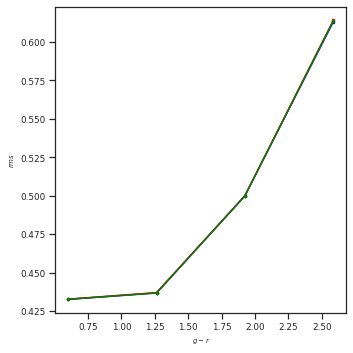

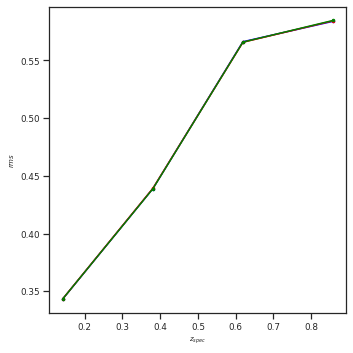

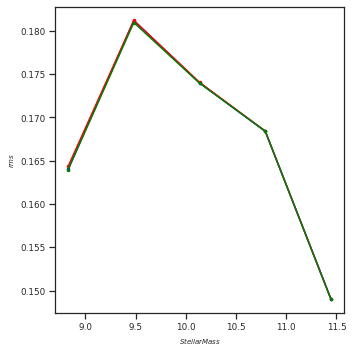

In [61]:
%%time
# Bines en magnitud r para masa estelar
cantbin = 5
rms_mass_1 = np.zeros(cantbin)
rms_mass_2 = np.zeros(cantbin)
rms_mass_3 = np.zeros(cantbin)
for j in range(3):
    if j == 0:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
           'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
           'modelMagErr_z', 'u-g', 'g-r',
           'r-i', 'i-z', 'u-g_err', 'g-r_err', 'r-i_err', 'i-z_err']]
    elif j == 1:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
           'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
           'modelMagErr_z', 'w1mag', 'w1sigmag', 'u-g', 'g-r',
           'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err', 'i-z_err',
           'r-w1_err']]
    elif j == 2:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
           'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
           'modelMagErr_z', 'w1mag', 'w2mag', 'w1sigmag', 'w2sigmag', 'u-g', 'g-r',
           'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err', 'i-z_err',
           'r-w1_err']]
    limsup_r1 = np.quantile(np.array(sdss_f['modelmag_r']),q=0.99)
    liminf_r1 = np.quantile(np.array(sdss_f['modelmag_r']),q=0.01)
    bines = np.linspace(liminf_r1,limsup_r1,cantbin + 1)
    marcasclase = (np.linspace(liminf_r1,limsup_r1,cantbin + 1)[1:] + 
                   np.linspace(liminf_r1,limsup_r1,cantbin + 1)[:-1]) / 2
    # rms para bines en magnitud r
    var = sdss_f[['modelmag_r']]
    var = np.array(var)
    rms_mass = np.zeros(cantbin)
    #rms_z = np.zeros(cantbin)
    for i in range(cantbin):
        mascara = (var > bines[i]) & (var < bines[i+1])
        x = ind_var_temp[mascara]
        y = dep_var[mascara]
        x_train, x_test, y_train, y_test = train_test_split(x,
                                                            y,
                                                            random_state=3210,
                                                            shuffle=True)
        model_fit = modelo.fit(x_train, y_train)
        predic = model_fit.predict(x_test)
        real = y_test[['Chabrier_MILES_total_mass']]
        real = np.array(real)
        rms_mass[i] = np.sqrt(np.mean((predic[:,0] - real[:,0]) ** 2))
        #real = y_test[['Z_NOQSO']]
        #real = np.array(real)
        #rms_z[i] = np.sqrt(np.mean((predic[:,1] - real[:,0]) ** 2))
    if j == 0:
        rms_mass_1 = rms_mass
    elif j == 1:
        rms_mass_2 = rms_mass
    elif j == 2:
        rms_mass_3 = rms_mass
print(rms_mass_1)
print(rms_mass_2)
print(rms_mass_3)
print(marcasclase)
print(limsup_r1)
print(liminf_r1)
fig,ax = plt.subplots(figsize=(5, 5))
lw = 1.5
ms = 2.5
ax.plot(marcasclase,rms_mass_1,color='Blue',marker='o',
         ms=ms,lw=lw)
ax.plot(marcasclase,rms_mass_2,color='Red',marker='o',
         ms=ms,lw=lw)
ax.plot(marcasclase,rms_mass_3,color='Green',marker='o',
         ms=ms,lw=lw)
ax.set_ylabel(r'$rms$',fontsize=7,fontweight="bold")
ax.set_xlabel(r'$m_r$',fontsize=7,fontweight="bold")
#plt.legend(['Stellar Mass'],fontsize='small',loc='upper left',frameon=False)
plt.tight_layout()
# Bines en color g-r para masa estelar
cantbin = 4
rms_mass_1 = np.zeros(cantbin)
rms_mass_2 = np.zeros(cantbin)
rms_mass_3 = np.zeros(cantbin)
for j in range(3):
    if j == 0:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
           'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
           'modelMagErr_z', 'u-g', 'g-r',
           'r-i', 'i-z', 'u-g_err', 'g-r_err', 'r-i_err', 'i-z_err']]
    elif j == 1:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
           'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
           'modelMagErr_z', 'w1mag', 'w1sigmag', 'u-g', 'g-r',
           'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err', 'i-z_err',
           'r-w1_err']]
    elif j == 2:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
           'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
           'modelMagErr_z', 'w1mag', 'w2mag', 'w1sigmag', 'w2sigmag', 'u-g', 'g-r',
           'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err', 'i-z_err',
           'r-w1_err']]
    limsup_r2 = np.quantile(np.array(sdss_f['g-r']),q=0.99)
    liminf_r2 = np.quantile(np.array(sdss_f['g-r']),q=0.01)
    bines = np.linspace(liminf_r2,limsup_r2,cantbin + 1)
    marcasclase = (np.linspace(liminf_r2,limsup_r2, cantbin + 1)[1:] + 
               np.linspace(liminf_r2,limsup_r2, cantbin + 1)[:-1]) / 2
    # rms para bines en magnitud r
    var = sdss_f[['g-r']]
    var = np.array(var)
    rms_mass = np.zeros(cantbin)
    rms_z = np.zeros(cantbin)
    for i in range(cantbin):
        mascara = (var > bines[i]) & (var < bines[i+1])
        x = ind_var[mascara]
        y = dep_var[mascara]
        x_train, x_test, y_train, y_test = train_test_split(x,
                                                            y,
                                                            random_state=3210,
                                                            shuffle=True)
        model_fit = modelo.fit(x_train, y_train)
        predic = model_fit.predict(x_test)
        real = y_test[['Chabrier_MILES_total_mass']]
        real = np.array(real)
        rms_mass[i] = np.sqrt(np.mean((predic[:,0] - real[:,0]) ** 2))
        #real = y_test[['Z_NOQSO']]
        #real = np.array(real)
        #rms_z[i] = np.sqrt(np.mean((predic[:,1] - real[:,0]) ** 2))
    if j == 0:
        rms_mass_1 = rms_mass
    elif j == 1:
        rms_mass_2 = rms_mass
    elif j == 2:
        rms_mass_3 = rms_mass
print(rms_mass_1)
print(rms_mass_2)
print(rms_mass_3)
print(marcasclase)
print(limsup_r2)
print(liminf_r2)
fig,ax = plt.subplots(figsize=(5, 5))
lw = 1.5
ms = 2.5
ax.plot(marcasclase,rms_mass_1,color='Blue',marker='o',
         ms=ms,lw=lw)
ax.plot(marcasclase,rms_mass_2,color='Red',marker='o',
         ms=ms,lw=lw)
ax.plot(marcasclase,rms_mass_3,color='Green',marker='o',
         ms=ms,lw=lw)
ax.set_ylabel(r'$rms$',fontsize=7,fontweight="bold")
ax.set_xlabel(r'$g-r$',fontsize=7,fontweight="bold")
#plt.legend(['Stellar Mass'],fontsize='small',loc='upper right',frameon=False)
plt.tight_layout()
# Bines en redshift espectroscópico para masa estelar
cantbin = 4
rms_mass_1 = np.zeros(cantbin)
rms_mass_2 = np.zeros(cantbin)
rms_mass_3 = np.zeros(cantbin)
for j in range(3):
    if j == 0:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
           'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
           'modelMagErr_z', 'u-g', 'g-r',
           'r-i', 'i-z', 'u-g_err', 'g-r_err', 'r-i_err', 'i-z_err']]
    elif j == 1:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
           'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
           'modelMagErr_z', 'w1mag', 'w1sigmag', 'u-g', 'g-r',
           'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err', 'i-z_err',
           'r-w1_err']]
    elif j == 2:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
           'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
           'modelMagErr_z', 'w1mag', 'w2mag', 'w1sigmag', 'w2sigmag', 'u-g', 'g-r',
           'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err', 'i-z_err',
           'r-w1_err']]
    limsup_r3 = np.quantile(np.array(sdss_f['Z_NOQSO']),q=0.99)
    liminf_r3 = np.quantile(np.array(sdss_f['Z_NOQSO']),q=0.01)
    bines = np.linspace(liminf_r3,limsup_r3,cantbin + 1)
    marcasclase = (np.linspace(liminf_r3,limsup_r3, cantbin + 1)[1:] + 
                   np.linspace(liminf_r3,limsup_r3, cantbin + 1)[:-1]) / 2
    # rms para bines en magnitud r
    var = sdss_f[['Z_NOQSO']]
    var = np.array(var)
    rms_mass = np.zeros(cantbin)
    rms_z = np.zeros(cantbin)
    for i in range(cantbin):
        mascara = (var > bines[i]) & (var < bines[i+1])
        x = ind_var[mascara]
        y = dep_var[mascara]
        x_train, x_test, y_train, y_test = train_test_split(x,
                                                            y,
                                                            random_state=3210,
                                                            shuffle=True)
        model_fit = modelo.fit(x_train, y_train)
        predic = model_fit.predict(x_test)
        real = y_test[['Chabrier_MILES_total_mass']]
        real = np.array(real)
        rms_mass[i] = np.sqrt(np.mean((predic[:,0] - real[:,0]) ** 2))
        #real = y_test[['Z_NOQSO']]
        #real = np.array(real)
        #rms_z[i] = np.sqrt(np.mean((predic[:,1] - real[:,0]) ** 2))
    if j == 0:
        rms_mass_1 = rms_mass
    elif j == 1:
        rms_mass_2 = rms_mass
    elif j == 2:
        rms_mass_3 = rms_mass
print(rms_mass_1)
print(rms_mass_2)
print(rms_mass_3)
print(marcasclase)
print(limsup_r3)
print(liminf_r3)
fig,ax = plt.subplots(figsize=(5, 5))
lw = 1.5
ms = 2.5
ax.plot(marcasclase,rms_mass_1,color='Blue',marker='o',
         ms=ms,lw=lw)
ax.plot(marcasclase,rms_mass_2,color='Red',marker='o',
         ms=ms,lw=lw)
ax.plot(marcasclase,rms_mass_3,color='Green',marker='o',
         ms=ms,lw=lw)
ax.set_ylabel(r'$rms$',fontsize=7,fontweight="bold")
ax.set_xlabel(r'$z_{spec}$',fontsize=7,fontweight="bold")
#plt.legend(['Stellar Mass'],fontsize='small',loc='upper left',frameon=False)
plt.tight_layout()
# Bines en masa para masa estelar
cantbin = 4
rms_mass_1 = np.zeros(cantbin)
rms_mass_2 = np.zeros(cantbin)
rms_mass_3 = np.zeros(cantbin)
for j in range(3):
    if j == 0:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
           'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
           'modelMagErr_z', 'u-g', 'g-r',
           'r-i', 'i-z', 'u-g_err', 'g-r_err', 'r-i_err', 'i-z_err']]
    elif j == 1:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
           'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
           'modelMagErr_z', 'w1mag', 'w1sigmag', 'u-g', 'g-r',
           'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err', 'i-z_err',
           'r-w1_err']]
    elif j == 2:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
           'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
           'modelMagErr_z', 'w1mag', 'w2mag', 'w1sigmag', 'w2sigmag', 'u-g', 'g-r',
           'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err', 'i-z_err',
           'r-w1_err']]
    limsup_r4 = np.quantile(np.array(sdss_f['Chabrier_MILES_total_mass']),q=0.99)
    liminf_r4 = np.quantile(np.array(sdss_f['Chabrier_MILES_total_mass']),q=0.01)
    bines = np.linspace(liminf_r4,limsup_r4,cantbin + 1)
    marcasclase = (np.linspace(liminf_r4,limsup_r4, cantbin + 1)[1:] + 
                   np.linspace(liminf_r4,limsup_r4, cantbin + 1)[:-1]) / 2
    # rms para bines en magnitud r
    var = sdss_f[['Chabrier_MILES_total_mass']]
    var = np.array(var)
    rms_mass = np.zeros(cantbin)
    rms_z = np.zeros(cantbin)
    for i in range(cantbin):
        mascara = (var > bines[i]) & (var < bines[i+1])
        x = ind_var[mascara]
        y = dep_var[mascara]
        x_train, x_test, y_train, y_test = train_test_split(x,
                                                            y,
                                                            random_state=3210,
                                                            shuffle=True)
        model_fit = modelo.fit(x_train, y_train)
        predic = model_fit.predict(x_test)
        real = y_test[['Chabrier_MILES_total_mass']]
        real = np.array(real)
        rms_mass[i] = np.sqrt(np.mean((predic[:,0] - real[:,0]) ** 2))
        #real = y_test[['Z_NOQSO']]
        #real = np.array(real)
        #rms_z[i] = np.sqrt(np.mean((predic[:,1] - real[:,0]) ** 2))
    if j == 0:
        rms_mass_1 = rms_mass
    elif j == 1:
        rms_mass_2 = rms_mass
    elif j == 2:
        rms_mass_3 = rms_mass
print(rms_mass_1)
print(rms_mass_2)
print(rms_mass_3)
print(marcasclase)
print(limsup_r4)
print(liminf_r4)
fig,ax = plt.subplots(figsize=(5, 5))
lw = 1.5
ms = 2.5
ax.plot(marcasclase,rms_mass_1,color='Blue',marker='o',
         ms=ms,lw=lw)
ax.plot(marcasclase,rms_mass_2,color='Red',marker='o',
         ms=ms,lw=lw)
ax.plot(marcasclase,rms_mass_3,color='Green',marker='o',
         ms=ms,lw=lw)
ax.set_ylabel(r'$rms$',fontsize=7,fontweight="bold")
ax.set_xlabel(r'$Stellar Mass$',fontsize=7,fontweight="bold")
#plt.legend(['Stellar Mass'],fontsize='small',loc='upper left',frameon=False)
plt.tight_layout()

[0.32556092 0.33297346 0.36490546 0.51496882 0.64302667]
[0.31623098 0.32572886 0.36023797 0.50835522 0.66752694]
[15.69607215 17.18957185 18.68307155 20.17657125 21.67007095]
22.4168208
14.9493223
[0.36759577 0.27227826 0.27707007 0.67127263]
[0.36760361 0.27223424 0.27713068 0.68344488]
[0.600762  1.2625522 1.9243424 2.5861326]
2.9170277000000007
0.26986690000000024
[0.3168251  0.30474253 0.40747025 0.85135958]
[0.31688345 0.30433552 0.40661936 0.83607071]
[0.14228149 0.38068994 0.61909839 0.85750684]
0.976711063
0.0230772645
[0.17271865 0.17109298 0.1628748  0.15278624 0.13060828]
[0.17294582 0.171109   0.16297953 0.15271633 0.13053141]
[ 8.82826066  9.48278438 10.13730809 10.79183181 11.44635552]
11.773617379401323
8.500998802009889
CPU times: user 3h 2min 34s, sys: 1.88 s, total: 3h 2min 36s
Wall time: 3h 2min 35s


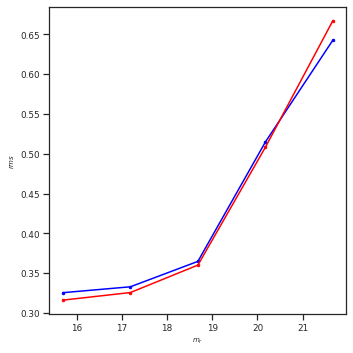

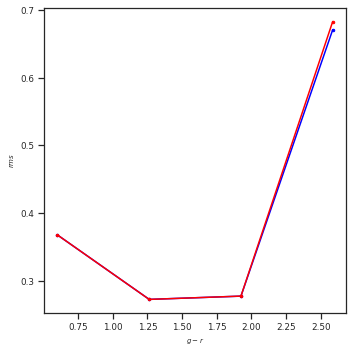

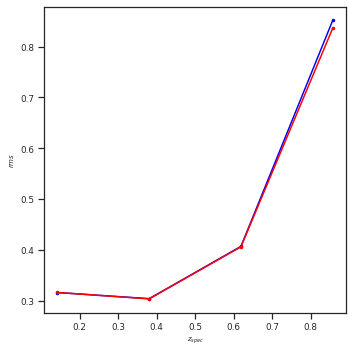

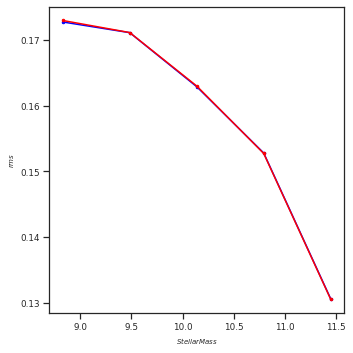

In [91]:
%%time
# Bines en magnitud r para masa estelar
cantbin = 5
rms_mass_1 = np.zeros(cantbin)
rms_mass_2 = np.zeros(cantbin)
for j in range(2):
    if j == 0:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
       'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
       'modelMagErr_z', 'w1mag', 'w2mag', 'w1sigmag', 'w2sigmag','u-g', 'g-r', 'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err',
       'i-z_err', 'r-w1_err']]
    elif j == 1:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
       'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
       'modelMagErr_z', 'w1mag', 'w2mag', 'w1sigmag', 'w2sigmag',
       'petroR50Err_g', 'petroR50Err_r', 'petroR90Err_g', 'petroR90Err_r',
       'u-g', 'g-r', 'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err',
       'i-z_err', 'r-w1_err', 'cr', 'cg']]
    limsup_r = 22.4168208
    liminf_r = 14.9493223
    bines = np.linspace(liminf_r,limsup_r,cantbin + 1)
    marcasclase = (np.linspace(liminf_r,limsup_r,cantbin + 1)[1:] + 
                   np.linspace(liminf_r,limsup_r,cantbin + 1)[:-1]) / 2
    # rms para bines en magnitud r
    var = sdss_f[['modelmag_r']]
    var = np.array(var)
    rms_mass = np.zeros(cantbin)
    #rms_z = np.zeros(cantbin)
    for i in range(cantbin):
        mascara = (var > bines[i]) & (var < bines[i+1])
        x = ind_var_temp[mascara]
        y = dep_var[mascara]
        x_train, x_test, y_train, y_test = train_test_split(x,
                                                            y,
                                                            random_state=3210,
                                                            shuffle=True)
        model_fit = modelo.fit(x_train, y_train)
        predic = model_fit.predict(x_test)
        real = y_test[['Chabrier_MILES_total_mass']]
        real = np.array(real)
        rms_mass[i] = np.sqrt(np.mean((predic[:,0] - real[:,0]) ** 2))
        #real = y_test[['Z_NOQSO']]
        #real = np.array(real)
        #rms_z[i] = np.sqrt(np.mean((predic[:,1] - real[:,0]) ** 2))
    if j == 0:
        rms_mass_1 = rms_mass
    elif j == 1:
        rms_mass_2 = rms_mass
print(rms_mass_1)
print(rms_mass_2)
print(marcasclase)
print(limsup_r)
print(liminf_r)
fig,ax = plt.subplots(figsize=(5, 5))
lw = 1.5
ms = 2.5
ax.plot(marcasclase,rms_mass_1,color='Blue',marker='o',
         ms=ms,lw=lw)
ax.plot(marcasclase,rms_mass_2,color='Red',marker='o',
         ms=ms,lw=lw)
ax.set_ylabel(r'$rms$',fontsize=7,fontweight="bold")
ax.set_xlabel(r'$m_r$',fontsize=7,fontweight="bold")
#plt.legend(['Stellar Mass'],fontsize='small',loc='upper left',frameon=False)
plt.tight_layout()
# Bines en color g-r para masa estelar
cantbin = 4
rms_mass_1 = np.zeros(cantbin)
rms_mass_2 = np.zeros(cantbin)
for j in range(2):
    if j == 0:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
       'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
       'modelMagErr_z', 'w1mag', 'w2mag', 'w1sigmag', 'w2sigmag','u-g', 'g-r', 'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err',
       'i-z_err', 'r-w1_err']]
    elif j == 1:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
       'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
       'modelMagErr_z', 'w1mag', 'w2mag', 'w1sigmag', 'w2sigmag',
       'petroR50Err_g', 'petroR50Err_r', 'petroR90Err_g', 'petroR90Err_r',
       'u-g', 'g-r', 'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err',
       'i-z_err', 'r-w1_err', 'cr', 'cg']]
    limsup_r = 2.9170277000000007
    liminf_r = 0.26986690000000024
    bines = np.linspace(liminf_r,limsup_r,cantbin + 1)
    marcasclase = (np.linspace(liminf_r,limsup_r, cantbin + 1)[1:] + 
               np.linspace(liminf_r,limsup_r, cantbin + 1)[:-1]) / 2
    # rms para bines en magnitud r
    var = sdss_f[['g-r']]
    var = np.array(var)
    rms_mass = np.zeros(cantbin)
    rms_z = np.zeros(cantbin)
    for i in range(cantbin):
        mascara = (var > bines[i]) & (var < bines[i+1])
        x = ind_var[mascara]
        y = dep_var[mascara]
        x_train, x_test, y_train, y_test = train_test_split(x,
                                                            y,
                                                            random_state=3210,
                                                            shuffle=True)
        model_fit = modelo.fit(x_train, y_train)
        predic = model_fit.predict(x_test)
        real = y_test[['Chabrier_MILES_total_mass']]
        real = np.array(real)
        rms_mass[i] = np.sqrt(np.mean((predic[:,0] - real[:,0]) ** 2))
        #real = y_test[['Z_NOQSO']]
        #real = np.array(real)
        #rms_z[i] = np.sqrt(np.mean((predic[:,1] - real[:,0]) ** 2))
    if j == 0:
        rms_mass_1 = rms_mass
    elif j == 1:
        rms_mass_2 = rms_mass
print(rms_mass_1)
print(rms_mass_2)
print(marcasclase)
print(limsup_r)
print(liminf_r)
fig,ax = plt.subplots(figsize=(5, 5))
lw = 1.5
ms = 2.5
ax.plot(marcasclase,rms_mass_1,color='Blue',marker='o',
         ms=ms,lw=lw)
ax.plot(marcasclase,rms_mass_2,color='Red',marker='o',
         ms=ms,lw=lw)
ax.set_ylabel(r'$rms$',fontsize=7,fontweight="bold")
ax.set_xlabel(r'$g-r$',fontsize=7,fontweight="bold")
#plt.legend(['Stellar Mass'],fontsize='small',loc='upper right',frameon=False)
plt.tight_layout()
# Bines en redshift espectroscópico para masa estelar
cantbin = 4
rms_mass_1 = np.zeros(cantbin)
rms_mass_2 = np.zeros(cantbin)
for j in range(2):
    if j == 0:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
       'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
       'modelMagErr_z', 'w1mag', 'w2mag', 'w1sigmag', 'w2sigmag','u-g', 'g-r', 'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err',
       'i-z_err', 'r-w1_err']]
    elif j == 1:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
       'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
       'modelMagErr_z', 'w1mag', 'w2mag', 'w1sigmag', 'w2sigmag',
       'petroR50Err_g', 'petroR50Err_r', 'petroR90Err_g', 'petroR90Err_r',
       'u-g', 'g-r', 'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err',
       'i-z_err', 'r-w1_err', 'cr', 'cg']]
    limsup_r = 0.976711063
    liminf_r = 0.0230772645
    bines = np.linspace(liminf_r,limsup_r,cantbin + 1)
    marcasclase = (np.linspace(liminf_r,limsup_r, cantbin + 1)[1:] + 
                   np.linspace(liminf_r,limsup_r, cantbin + 1)[:-1]) / 2
    # rms para bines en magnitud r
    var = sdss_f[['Z_NOQSO']]
    var = np.array(var)
    rms_mass = np.zeros(cantbin)
    rms_z = np.zeros(cantbin)
    for i in range(cantbin):
        mascara = (var > bines[i]) & (var < bines[i+1])
        x = ind_var[mascara]
        y = dep_var[mascara]
        x_train, x_test, y_train, y_test = train_test_split(x,
                                                            y,
                                                            random_state=3210,
                                                            shuffle=True)
        model_fit = modelo.fit(x_train, y_train)
        predic = model_fit.predict(x_test)
        real = y_test[['Chabrier_MILES_total_mass']]
        real = np.array(real)
        rms_mass[i] = np.sqrt(np.mean((predic[:,0] - real[:,0]) ** 2))
        #real = y_test[['Z_NOQSO']]
        #real = np.array(real)
        #rms_z[i] = np.sqrt(np.mean((predic[:,1] - real[:,0]) ** 2))
    if j == 0:
        rms_mass_1 = rms_mass
    elif j == 1:
        rms_mass_2 = rms_mass
print(rms_mass_1)
print(rms_mass_2)
print(marcasclase)
print(limsup_r)
print(liminf_r)
fig,ax = plt.subplots(figsize=(5, 5))
lw = 1.5
ms = 2.5
ax.plot(marcasclase,rms_mass_1,color='Blue',marker='o',
         ms=ms,lw=lw)
ax.plot(marcasclase,rms_mass_2,color='Red',marker='o',
         ms=ms,lw=lw)
ax.set_ylabel(r'$rms$',fontsize=7,fontweight="bold")
ax.set_xlabel(r'$z_{spec}$',fontsize=7,fontweight="bold")
#plt.legend(['Stellar Mass'],fontsize='small',loc='upper left',frameon=False)
plt.tight_layout()
# Bines en masa para masa estelar
cantbin = 5
rms_mass_1 = np.zeros(cantbin)
rms_mass_2 = np.zeros(cantbin)
for j in range(2):
    if j == 0:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
       'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
       'modelMagErr_z', 'w1mag', 'w2mag', 'w1sigmag', 'w2sigmag','u-g', 'g-r', 'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err',
       'i-z_err', 'r-w1_err']]
    elif j == 1:
        ind_var_temp = ind_var[['modelmag_u', 'modelmag_g', 'modelmag_r', 'modelmag_i', 'modelmag_z',
       'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
       'modelMagErr_z', 'w1mag', 'w2mag', 'w1sigmag', 'w2sigmag',
       'petroR50Err_g', 'petroR50Err_r', 'petroR90Err_g', 'petroR90Err_r',
       'u-g', 'g-r', 'r-i', 'i-z', 'r-w1', 'u-g_err', 'g-r_err', 'r-i_err',
       'i-z_err', 'r-w1_err', 'cr', 'cg']]
    limsup_r = 11.773617379401323
    liminf_r = 8.500998802009889
    bines = np.linspace(liminf_r,limsup_r,cantbin + 1)
    marcasclase = (np.linspace(liminf_r,limsup_r, cantbin + 1)[1:] + 
                   np.linspace(liminf_r,limsup_r, cantbin + 1)[:-1]) / 2
    # rms para bines en magnitud r
    var = sdss_f[['Chabrier_MILES_total_mass']]
    var = np.array(var)
    rms_mass = np.zeros(cantbin)
    rms_z = np.zeros(cantbin)
    for i in range(cantbin):
        mascara = (var > bines[i]) & (var < bines[i+1])
        x = ind_var[mascara]
        y = dep_var[mascara]
        x_train, x_test, y_train, y_test = train_test_split(x,
                                                            y,
                                                            random_state=3210,
                                                            shuffle=True)
        model_fit = modelo.fit(x_train, y_train)
        predic = model_fit.predict(x_test)
        real = y_test[['Chabrier_MILES_total_mass']]
        real = np.array(real)
        rms_mass[i] = np.sqrt(np.mean((predic[:,0] - real[:,0]) ** 2))
        #real = y_test[['Z_NOQSO']]
        #real = np.array(real)
        #rms_z[i] = np.sqrt(np.mean((predic[:,1] - real[:,0]) ** 2))
    if j == 0:
        rms_mass_1 = rms_mass
    elif j == 1:
        rms_mass_2 = rms_mass
print(rms_mass_1)
print(rms_mass_2)
print(marcasclase)
print(limsup_r)
print(liminf_r)
fig,ax = plt.subplots(figsize=(5, 5))
lw = 1.5
ms = 2.5
ax.plot(marcasclase,rms_mass_1,color='Blue',marker='o',
         ms=ms,lw=lw)
ax.plot(marcasclase,rms_mass_2,color='Red',marker='o',
         ms=ms,lw=lw)
ax.set_ylabel(r'$rms$',fontsize=7,fontweight="bold")
ax.set_xlabel(r'$Stellar Mass$',fontsize=7,fontweight="bold")
#plt.legend(['Stellar Mass'],fontsize='small',loc='upper left',frameon=False)
plt.tight_layout()

# Encontrando las PDFs

In [248]:
def plot_pdf(z_dist, mass_dist, ind_vars_test, dep_vars_test, obj_nro):
    g = sns.jointplot(z_dist,mass_dist, kind="kde", fill=True)
    print('z_pred', modelo.predict(ind_vars_test.iloc[obj_nro-1:obj_nro,:])[0,1])
    print('z_true', dep_vars_test['Z_NOQSO'].iloc[obj_nro-1])
    print('mass_pred', modelo.predict(ind_vars_test.iloc[obj_nro-1:obj_nro,:])[0,0])
    print('mass_true', dep_vars_test['Chabrier_MILES_total_mass'].iloc[obj_nro-1])
    g.ax_joint.axvline(x=modelo.predict(ind_vars_test.iloc[obj_nro-1:obj_nro,:])[0,1],
                          linestyle='--',color='red')
    g.ax_joint.axhline(y=modelo.predict(ind_vars_test.iloc[obj_nro-1:obj_nro,:])[0,0],
                          linestyle='--',color='red')
    g.ax_marg_x.axvline(x=modelo.predict(ind_vars_test.iloc[obj_nro-1:obj_nro,:])[0,1],
                           linestyle='--', color='red')
    g.ax_marg_y.axhline(y=modelo.predict(ind_vars_test.iloc[obj_nro-1:obj_nro,:])[0,0],
                           linestyle='--', color='red')
    g.ax_joint.axvline(x=dep_vars_test['Z_NOQSO'].iloc[obj_nro-1],
                          linestyle='--',color='black')
    g.ax_joint.axhline(y=dep_vars_test['Chabrier_MILES_total_mass'].iloc[obj_nro-1],
                          linestyle='--',color='black')
    g.ax_marg_x.axvline(x=dep_vars_test['Z_NOQSO'].iloc[obj_nro-1], 
                           linestyle='--',color='black')
    g.ax_marg_y.axhline(y=dep_vars_test['Chabrier_MILES_total_mass'].iloc[obj_nro-1],
                           linestyle='--', color='black')
    g.ax_joint.set_xlabel(r'$Z_{photo}$')
    g.ax_joint.set_ylabel(r'$log_{10}(M_{\ast} / M_{\odot})_{pred}$')
    plt.tight_layout()
    plt.savefig('pdf1.jpg')
    if False:
        g.ax_joint.axvline(x=z_dist.mean(),
                              linestyle='--',color='green')
        g.ax_joint.axhline(y=mass_dist.mean(),
                              linestyle='--',color='green')
        g.ax_marg_x.axvline(x=z_dist.mean(),
                               linestyle='--', color='green')
        g.ax_marg_y.axhline(y=mass_dist.mean(),
                               linestyle='--', color='green')
    #plt.plot(0,20,color='red', marker='*',
    #                          markersize=10, linestyle='None')

In [201]:
%%time
train_trees = modelo.apply(ind_vars_train)
train_trees = np.array(train_trees)

CPU times: user 1min 33s, sys: 184 ms, total: 1min 33s
Wall time: 1min 33s


In [205]:
%%time
nro_samples_train = len(ind_vars_train)
Z_NOQSO = np.array(dep_vars_train['Z_NOQSO'])
Chabrier_MILES_total_mass = np.array(dep_vars_train['Chabrier_MILES_total_mass'])
ind_leaves = np.unique(train_trees)
n_trees = modelo.n_estimators

CPU times: user 8.3 s, sys: 152 ms, total: 8.45 s
Wall time: 8.45 s


In [23]:
global train_trees, nro_samples_train, Z_NOQSO, Chabrier_MILES_total_mass, ind_leaves, n_trees

In [24]:
obj_nro = 1
obj = ind_vars_test.iloc[obj_nro-1:obj_nro,:]
id_leaf_obj = model_fit.apply(obj)
#obj = x_test[0]
#obj = obj.reshape(1, -1)

In [203]:
@njit(parallel=True)
def one_pdf(id_leaf_obj, ind_leaves, train_trees, nro_samples_train, z_NOQSO,
            Chabrier_MILES_total_mass, n_trees):
    cont = 0
    for tree in prange(n_trees):
        cont = cont + np.sum(id_leaf_obj[0,tree] == train_trees[:,tree])
    z_dist = np.zeros(cont)
    mass_dist = np.zeros(cont)
    j = 0
    for tree in range(n_trees):
        for sample in range(nro_samples_train):
            if train_trees[sample,tree] == id_leaf_obj[0,tree]:
                z_dist[j] = z_NOQSO[sample]
                mass_dist[j] = Chabrier_MILES_total_mass[sample]
                j += 1
    return z_dist, mass_dist

In [26]:
%%timeit
z_dist, mass_dist = one_pdf(id_leaf_obj, ind_leaves, train_trees, nro_samples_train, Z_NOQSO,
            Chabrier_MILES_total_mass, n_trees)

202 ms ± 9.43 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


z_pred 0.378994074
z_true 0.3724318
mass_pred 10.846162220325667
mass_true 10.75113046359394
CPU times: user 2.11 s, sys: 200 ms, total: 2.31 s
Wall time: 586 ms


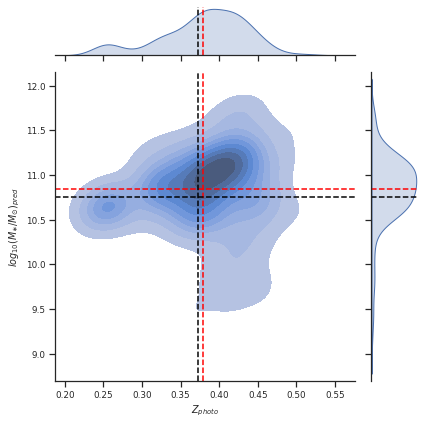

In [249]:
%%time
obj_nro = 5
obj = ind_vars_test.iloc[obj_nro-1:obj_nro,:]
id_leaf_obj = model_fit.apply(obj)
z_dist, mass_dist = one_pdf(id_leaf_obj, ind_leaves, train_trees, nro_samples_train, Z_NOQSO,
            Chabrier_MILES_total_mass, n_trees)
plot_pdf(z_dist, mass_dist, ind_vars_test, dep_vars_test, obj_nro)

/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


z_pred 0.5067181059999998
z_true 0.4938676
mass_pred 10.759458798228625
mass_true 10.52681234892437


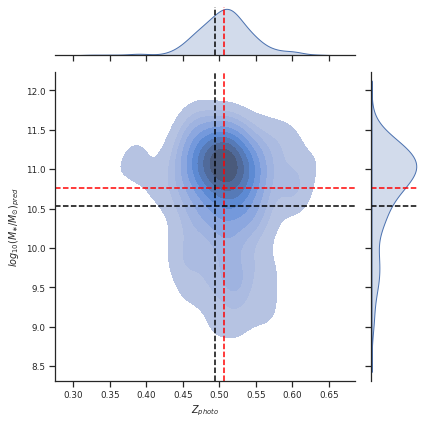

In [250]:
obj_nro = 50
obj = ind_vars_test.iloc[obj_nro-1:obj_nro,:]
id_leaf_obj = model_fit.apply(obj)
z_dist, mass_dist = one_pdf(id_leaf_obj, ind_leaves, train_trees, nro_samples_train, Z_NOQSO,
            Chabrier_MILES_total_mass, n_trees)
plot_pdf(z_dist, mass_dist, ind_vars_test, dep_vars_test, obj_nro)

/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


z_pred 0.5670313699999997
z_true 0.5527467
mass_pred 10.558695384371726
mass_true 10.744985423954839


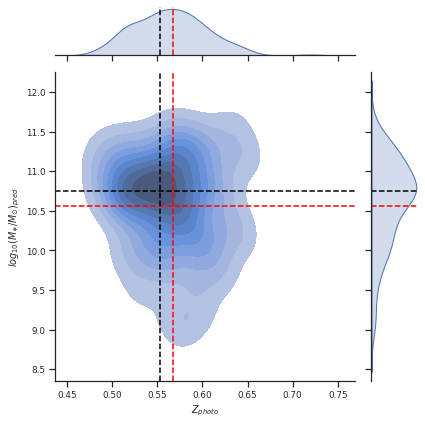

In [251]:
obj_nro = 200
obj = ind_vars_test.iloc[obj_nro-1:obj_nro,:]
id_leaf_obj = model_fit.apply(obj)
z_dist, mass_dist = one_pdf(id_leaf_obj, ind_leaves, train_trees, nro_samples_train, Z_NOQSO,
            Chabrier_MILES_total_mass, n_trees)
plot_pdf(z_dist, mass_dist, ind_vars_test, dep_vars_test, obj_nro)

/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


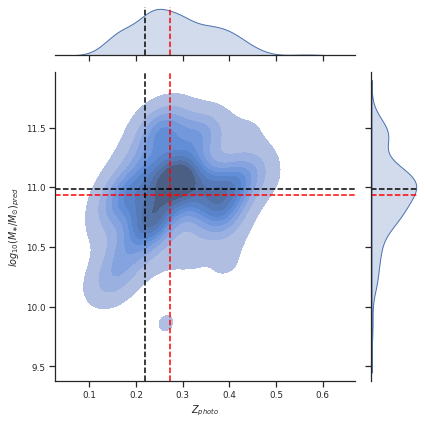

In [235]:
obj_nro = 400
obj = ind_vars_test.iloc[obj_nro-1:obj_nro,:]
id_leaf_obj = model_fit.apply(obj)
z_dist, mass_dist = one_pdf(id_leaf_obj, ind_leaves, train_trees, nro_samples_train, Z_NOQSO,
            Chabrier_MILES_total_mass, n_trees)
plot_pdf(z_dist, mass_dist, ind_vars_test, dep_vars_test, obj_nro)

/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


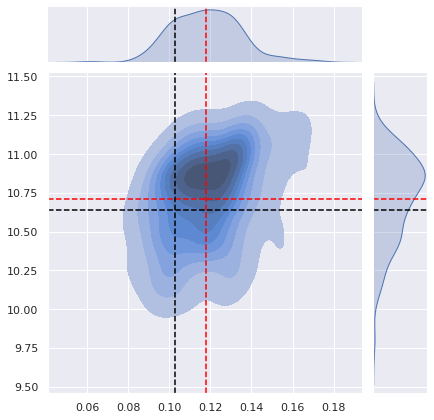

In [39]:
obj_nro = 600
obj = ind_vars_test.iloc[obj_nro-1:obj_nro,:]
id_leaf_obj = model_fit.apply(obj)
z_dist, mass_dist = one_pdf(id_leaf_obj, ind_leaves, train_trees, nro_samples_train, Z_NOQSO,
            Chabrier_MILES_total_mass, n_trees)
plot_pdf(z_dist, mass_dist, ind_vars_test, dep_vars_test, obj_nro)

/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


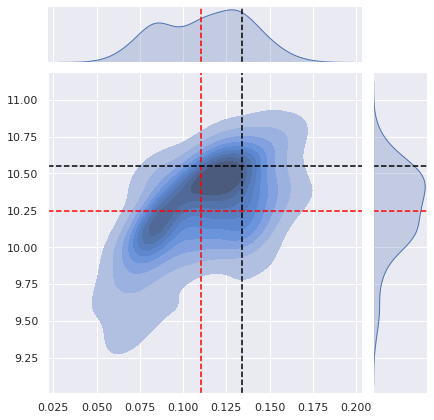

In [40]:
obj_nro = 1010
obj = ind_vars_test.iloc[obj_nro-1:obj_nro,:]
id_leaf_obj = model_fit.apply(obj)
z_dist, mass_dist = one_pdf(id_leaf_obj, ind_leaves, train_trees, nro_samples_train, Z_NOQSO,
            Chabrier_MILES_total_mass, n_trees)
plot_pdf(z_dist, mass_dist, ind_vars_test, dep_vars_test, obj_nro)

/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


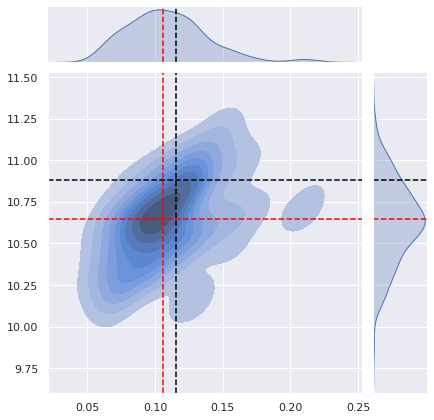

In [41]:
obj_nro = 2000
obj = ind_vars_test.iloc[obj_nro-1:obj_nro,:]
id_leaf_obj = model_fit.apply(obj)
z_dist, mass_dist = one_pdf(id_leaf_obj, ind_leaves, train_trees, nro_samples_train, Z_NOQSO,
            Chabrier_MILES_total_mass, n_trees)
plot_pdf(z_dist, mass_dist, ind_vars_test, dep_vars_test, obj_nro)

/home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


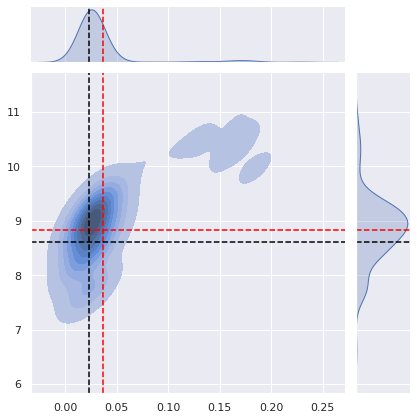

In [42]:
obj_nro = 1
obj = ind_vars_test.iloc[obj_nro-1:obj_nro,:]
id_leaf_obj = model_fit.apply(obj)
z_dist, mass_dist = one_pdf(id_leaf_obj, ind_leaves, train_trees, nro_samples_train, Z_NOQSO,
            Chabrier_MILES_total_mass, n_trees)
plot_pdf(z_dist, mass_dist, ind_vars_test, dep_vars_test, obj_nro)

In [42]:
# Cálculo de las dispersiones de las pdf
z_sigma = np.zeros(len(ind_vars_test))
mass_sigma = np.zeros(len(ind_vars_test))

In [43]:
global z_sigma, mass_sigma

In [41]:
%%time
for i in range(len(ind_vars_test)):
    if i%1000 == 0:
        print(i)
    obj_nro = i + 1
    obj = ind_vars_test.iloc[obj_nro-1:obj_nro,:]
    id_leaf_obj = model_fit.apply(obj)
    z_dist, mass_dist = one_pdf(id_leaf_obj, ind_leaves, train_trees, nro_samples_train, Z_NOQSO,
                Chabrier_MILES_total_mass, n_trees)
    z_sigma[i] = z_dist.std()
    mass_sigma[i] = mass_dist.std()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [42]:
np.sum(z_sigma < 0.03) / len(z_sigma)

0.45315892390728385

In [55]:
np.sum(mass_sigma < 0.5) / len(mass_sigma)

0.5983221806961684

In [36]:
%%timeit
for i in range(30):
    if i%1000 == 0:
        print(i)
    obj_nro = i + 1
    obj = ind_vars_test.iloc[obj_nro-1:obj_nro,:]
    id_leaf_obj = model_fit.apply(obj)
    z_dist, mass_dist = one_pdf(id_leaf_obj, ind_leaves, train_trees, nro_samples_train, Z_NOQSO,
                Chabrier_MILES_total_mass, n_trees)
    z_sigma[i] = z_dist.std()
    mass_sigma[i] = mass_dist.std()

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6.36 s ± 64.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
objs = model_fit.apply(ind_vars_test)

In [30]:
global objs

In [65]:
@njit(parallel=True)
def fun(objs, ind_leaves, train_trees, nro_samples_train, Z_NOQSO,
            Chabrier_MILES_total_mass, n_trees):
    for i in range(30):
        #if i%1000 == 0:
        #    print(i)
        id_leaf_obj = objs[i,:]
        id_leaf_obj = id_leaf_obj.T
        cont = 0
        for tree in range(n_trees):
            cont = cont + np.sum(id_leaf_obj[tree] == train_trees[:,tree])
        z_dist = np.zeros(cont)
        mass_dist = np.zeros(cont)
        j = 0
        for tree in range(n_trees):
            for sample in range(nro_samples_train):
                if (train_trees[sample,tree] == id_leaf_obj[tree]):
                    z_dist[j] = Z_NOQSO[sample]
                    mass_dist[j] = Chabrier_MILES_total_mass[sample]
                    j += 1
        z_sigma[i] = np.std(z_dist)
        mass_sigma[i] = np.std(mass_dist)
        #return z_dist.std(), mass_dist.std()
    return z_sigma, mass_sigma

In [66]:
%%time
fun(objs, ind_leaves, train_trees, nro_samples_train, Z_NOQSO,
            Chabrier_MILES_total_mass, n_trees)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mNo implementation of function Function(<built-in function setitem>) found for signature:
 
 >>> setitem(readonly array(float64, 1d, C), int64, float64)
 
There are 16 candidate implementations:
[1m      - Of which 14 did not match due to:
      Overload of function 'setitem': File: <numerous>: Line N/A.
        With argument(s): '(readonly array(float64, 1d, C), int64, float64)':[0m
[1m       No match.[0m
[1m      - Of which 2 did not match due to:
      Overload in function 'SetItemBuffer.generic': File: numba/core/typing/arraydecl.py: Line 176.
        With argument(s): '(readonly array(float64, 1d, C), int64, float64)':[0m
[1m       Rejected as the implementation raised a specific error:
         NumbaTypeError: [1mCannot modify readonly array of type: readonly array(float64, 1d, C)[0m[0m
  raised from /home/clopez/anaconda3/envs/testgun/lib/python3.8/site-packages/numba/core/typing/arraydecl.py:183
[0m
[0m[1mDuring: typing of setitem at /tmp/ipykernel_8385/3341675461.py (21)[0m
[1m
File "../../../../../tmp/ipykernel_8385/3341675461.py", line 21:[0m
[1m<source missing, REPL/exec in use?>[0m


In [41]:
%%timeit
from joblib import Parallel, delayed
Parallel(n_jobs=25)(delayed(fun)(i) for i in range(30))

1min 20s ± 756 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
0
0
0
0
0
0
0
0


In [39]:
((((500000*6.36)/30)/60)/60)

29.444444444444446

# Precisión del algoritmo

<AxesSubplot:xlabel='Z_NOQSO', ylabel='Count'>

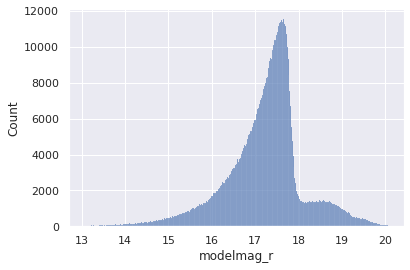

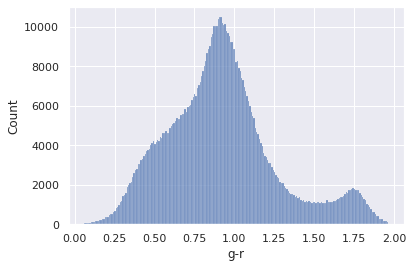

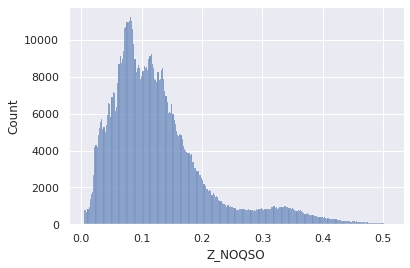

In [99]:
plt.figure()
limsup_r = np.quantile(np.array(sdss_f['modelmag_r']),q=0.999)
liminf_r = np.quantile(np.array(sdss_f['modelmag_r']),q=0.001)
sns.histplot(sdss_f['modelmag_r'],binrange=[liminf_r,limsup_r])
plt.figure()
limsup_r = np.quantile(np.array(sdss_f['g-r']),q=0.999)
liminf_r = np.quantile(np.array(sdss_f['g-r']),q=0.001)
sns.histplot(sdss_f['g-r'],binrange=[liminf_r,limsup_r])
plt.figure()
limsup_r = np.quantile(np.array(sdss_f['Z_NOQSO']),q=0.999)
liminf_r = np.quantile(np.array(sdss_f['Z_NOQSO']),q=0.001)
sns.histplot(sdss_f['Z_NOQSO'],binrange=[liminf_r,limsup_r])

In [102]:
# Bines en color g-r
bgr = [-1,0.6,1.25,4]
# Bines en magnitud r
br = [0,16,17,18,19,30]
# Bines en redshift fotométrico
bpz = [0,0.05,0.1,0.2,0.25,0.3,10]
# Bines en redshift espectroscópico

In [70]:
ies = np.arange(len(sdss_f))
x_train, y_train, x_test, y_test = train_test_split(ies, 
                                                    ies,
                                                    random_state=3210,
                                                    shuffle=True)

0.34775037515486273
0.3239553455600007
0.3349639855998917
0.3653187954956266
0.4542158807443995


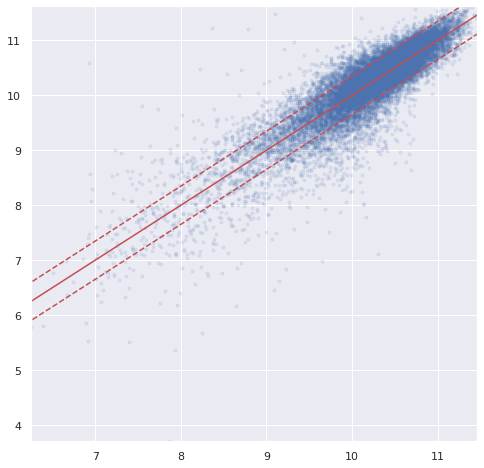

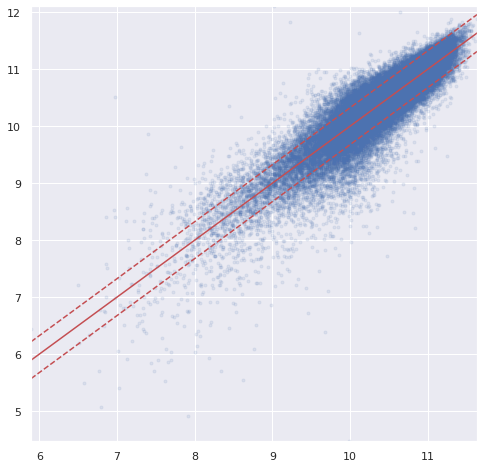

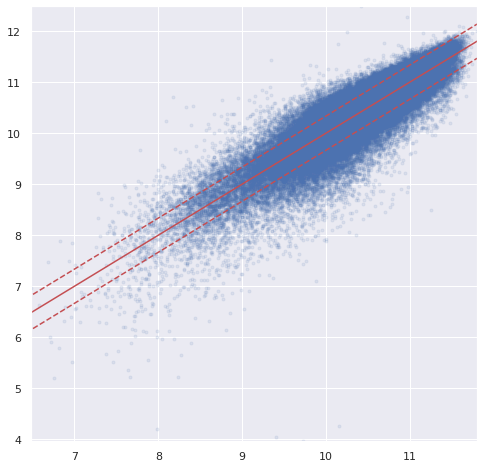

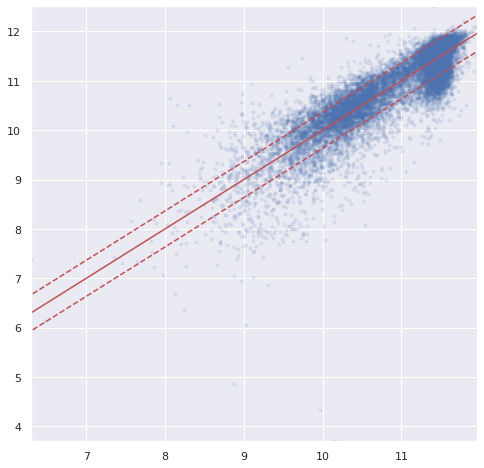

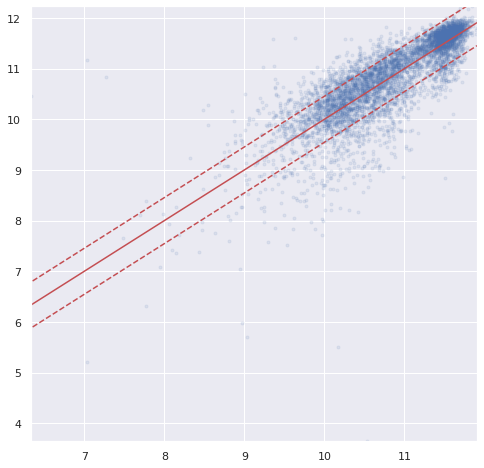

In [98]:
# rms para bines en magnitud r
var = sdss_f['modelmag_r'].iloc[y_test]
var = np.array(var)
for i in range(5):
    mascara = (var > br[i]) & (var < br[i+1])
    predic = model_pred[mascara][:,0]
    real = dep_vars_test['Chabrier_MILES_total_mass'][mascara]
    plt.figure(figsize=(8,8))
    plt.scatter(predic, real, alpha=0.1, marker='.')
    rms = np.sqrt(np.mean((predic - real) ** 2))
    xmin = min(predic.min(),real.min())
    ymax = min(predic.max(),real.max())
    plt.plot([xmin,ymax], [xmin,ymax], color='r')
    plt.plot([xmin,predic.max()], [xmin,predic.max()] + rms, ls='--', color='r')
    plt.plot([xmin,predic.max()], [xmin,predic.max()] - rms, ls='--', color='r')
    plt.xlim(predic.min(),predic.max())
    plt.ylim(real.min(),real.max())
    print(rms)

0.45178222152482345
0.3179216489061977
0.28184278616910424


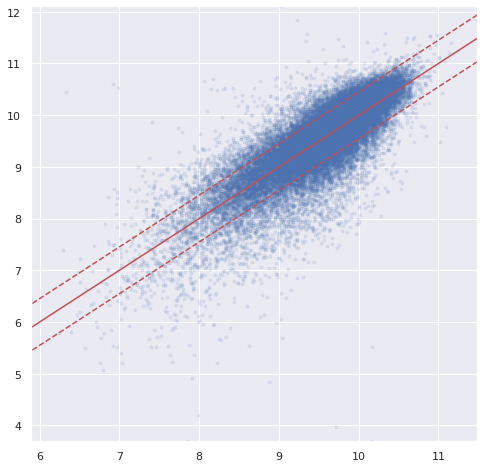

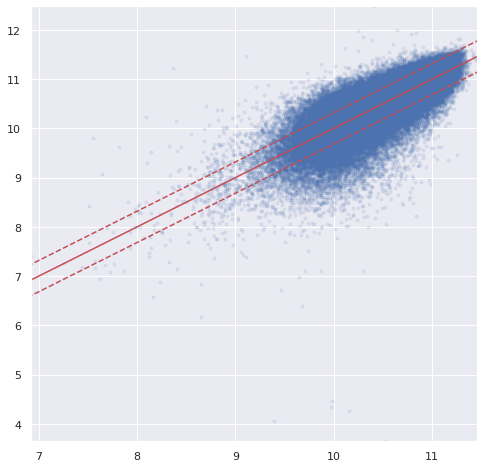

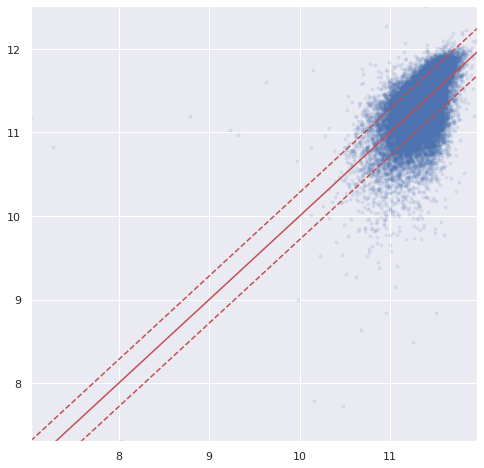

In [97]:
# rms para bines en color g-r
var = sdss_f['g-r'].iloc[y_test]
var = np.array(var)
for i in range(3):
    mascara = (var > bgr[i]) & (var < bgr[i+1])
    predic = model_pred[mascara][:,0]
    real = dep_vars_test['Chabrier_MILES_total_mass'][mascara]
    plt.figure(figsize=(8,8))
    plt.scatter(predic, real, alpha=0.1, marker='.')
    rms = np.sqrt(np.mean((predic - real) ** 2))
    xmin = min(predic.min(),real.min())
    ymax = min(predic.max(),real.max())
    plt.plot([xmin,ymax], [xmin,ymax], color='r')
    plt.plot([xmin,predic.max()], [xmin,predic.max()] + rms, ls='--', color='r')
    plt.plot([xmin,predic.max()], [xmin,predic.max()] - rms, ls='--', color='r')
    plt.xlim(predic.min(),predic.max())
    plt.ylim(real.min(),real.max())
    print(rms)

In [91]:
# rms para bines en pz
var = sdss_f['g-r'].iloc[y_test]
var = np.array(var)
for i in range(3):
    mascara = (var > bgr[i]) & (var < bgr[i+1])
    predic = model_pred[mascara][:,0]
    real = dep_vars_test['Chabrier_MILES_total_mass'][mascara]
    plt.figure(figsize=(8,8))
    plt.scatter(predic, real, alpha=0.1, marker='.')
    rms = np.sqrt(np.mean((predic - real) ** 2))
    xmin = min(predic.min(),real.min())
    ymax = min(predic.max(),real.max())
    plt.plot([xmin,ymax], [xmin,ymax], color='r')
    plt.plot([xmin,predic.max()], [xmin,predic.max()] + rms, ls='--', color='r')
    plt.plot([xmin,predic.max()], [xmin,predic.max()] - rms, ls='--', color='r')
    plt.xlim(predic.min(),predic.max())
    plt.ylim(real.min(),real.max())
    print(rms)

7.028103901243429

0.5021318640790122
0.33460753940811616
0.29276053866695384
0.3013029093828209
0.32391797229518465
0.31864951749700676


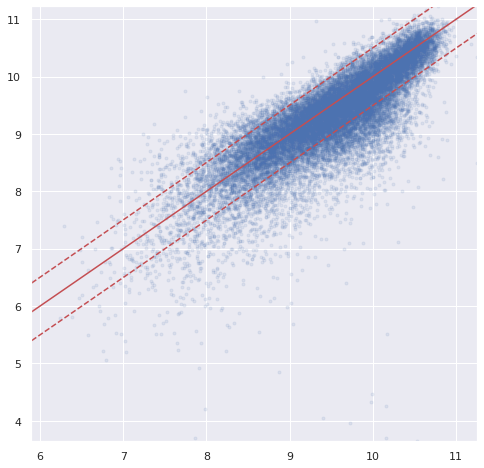

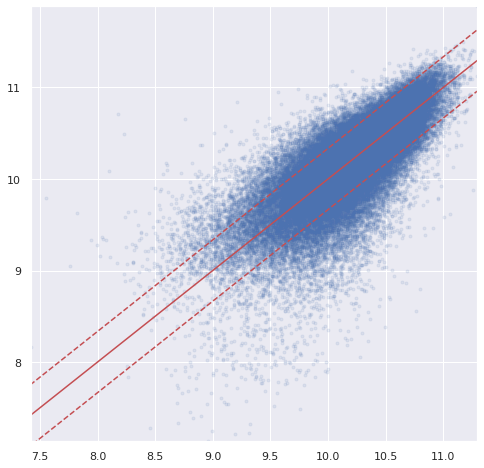

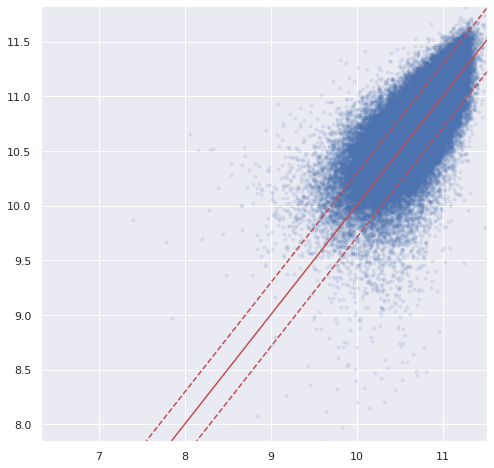

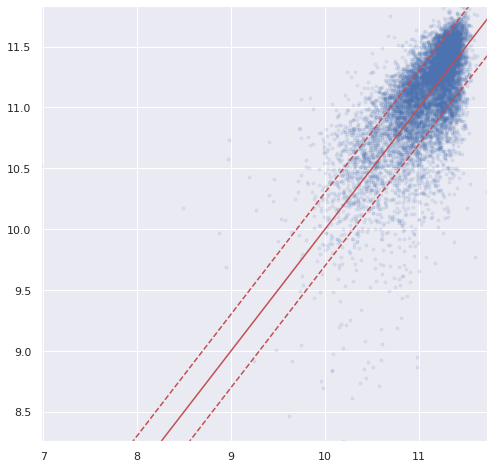

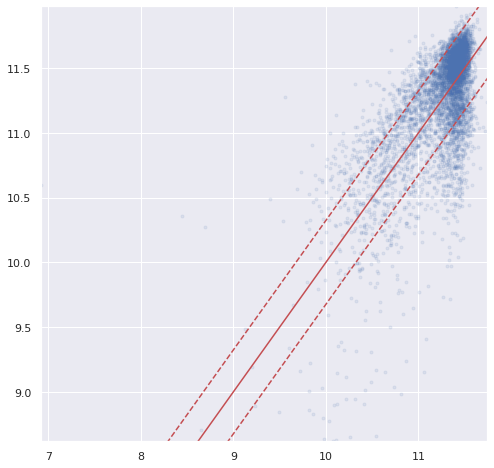

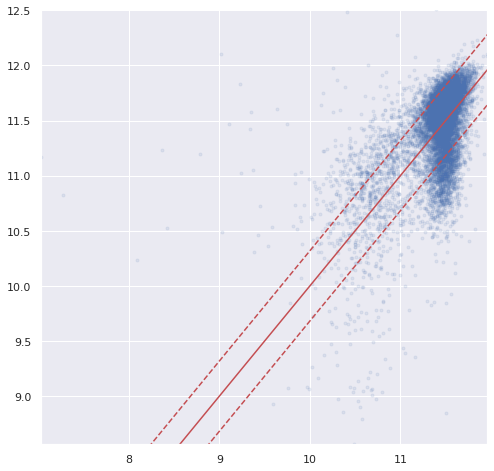

In [103]:
# rms para bines en specz
var = sdss_f['Z_NOQSO'].iloc[y_test]
var = np.array(var)
for i in range(6):
    mascara = (var > bpz[i]) & (var < bpz[i+1])
    predic = model_pred[mascara][:,0]
    real = dep_vars_test['Chabrier_MILES_total_mass'][mascara]
    plt.figure(figsize=(8,8))
    plt.scatter(predic, real, alpha=0.1, marker='.')
    rms = np.sqrt(np.mean((predic - real) ** 2))
    xmin = min(predic.min(),real.min())
    ymax = min(predic.max(),real.max())
    plt.plot([xmin,ymax], [xmin,ymax], color='r')
    plt.plot([xmin,predic.max()], [xmin,predic.max()] + rms, ls='--', color='r')
    plt.plot([xmin,predic.max()], [xmin,predic.max()] - rms, ls='--', color='r')
    plt.xlim(predic.min(),predic.max())
    plt.ylim(real.min(),real.max())
    print(rms)

In [190]:
a = np.array([[1,3],
             [6,10],
             [20,25]])
b = np.array([[1,1],
             [2,1],
             [1,1]])
print(a)
print(b)
np.random.seed(3210)
fakes = 1# Cantidad de datos a crear por galaxia
col = 2# Cantidad de columnas con errores
nsam = 3# Cantodad de galaxias en la muestra
for k in range(fakes):
    for i in range(nsam):
            var = np.zeros([1, col ])
            for j in range(col):
                var[0,j] = np.random.normal(a[i,j],b[i,j],1)
            a = np.concatenate((a,var),axis=0)
a

[[ 1  3]
 [ 6 10]
 [20 25]]
[[1 1]
 [2 1]
 [1 1]]


array([[ 1.        ,  3.        ],
       [ 6.        , 10.        ],
       [20.        , 25.        ],
       [-0.8629537 ,  2.49792539],
       [ 9.86842257,  9.43279636],
       [18.64716262, 25.21690351]])

In [244]:
(1950+2400+3810) - (1950+2400+3810)*0.4

4896.0

In [243]:
(1950+2400+3810)*0.4

3264.0